<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Александр! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
Марат, привет! Спасибо за ревью. Свои комментарии буду помечать цветом. 
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Александр! Принято
    
    
(везде свои комментарии на твои ставить не буду, их и так их много, поставлю только там где хочу кое-что добавить, уточнить)    


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Ниже добавил краткое описание поставленной в проекте задачи
</div>

## Вступление

Цель работы - помочь заказчику выбрать коров из предложенного поставщиком списка, так, чтобы они соответствовали предъявляемым требованиям. Основные критерии отбора коров: удой и вкус молока. Обучение моделей для отбора коров будет осуществляться на основани данных о коровах из стада заказчика. Целевые признаки и их значения:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

In [1]:
! pip install phik

   ---------------------------------------- 0.0/666.3 kB ? eta -:--:--
    --------------------------------------- 10.2/666.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/666.3 kB 435.7 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/666.3 kB 653.6 kB/s eta 0:00:01
   ----------- ---------------------------- 194.6/666.3 kB 1.3 MB/s eta 0:00:01
   --------------------- ------------------ 358.4/666.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  665.6/666.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 666.3/666.3 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (r2_score, 
                             mean_absolute_error,
                             mean_squared_error,                              
                             recall_score,
                             precision_score,
                             accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
import phik


In [3]:
# Функция для подготовки датасета перед обучением модели
def split_scale_ohe_linreg (X, y, num_cols, cat_cols):
    
    # Разбиваем датасет на тренировочный и тестовый
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
    
    # Масштабируем числовые признаки
    scaler = StandardScaler()
    scaler.fit(X_train[num_cols])
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    # Кодируем категориальные признаки
    encoder = OneHotEncoder(drop='first', sparse=False)
    encoder.fit(X_train[cat_cols])
    ohe_cols = encoder.get_feature_names()
    
    X_train[ohe_cols] = encoder.transform(X_train[cat_cols])
    X_test[ohe_cols] = encoder.transform(X_test[cat_cols])
    X_train = X_train.drop(cat_cols, axis=1)
    X_test = X_test.drop(cat_cols, axis=1)
    
    # Обучение модели линейной регрессии
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train, y_train)
    
    # Прогноз
    y_pred = lin_reg_model.predict(X_test)
    
    return lin_reg_model, y_test, y_pred, scaler, encoder, X_train.columns

In [4]:
# Функция для расчета метрик количественных признаков
def metrics (y_test, y_pred):
    R2 = r2_score (y_test, y_pred)
    MSE = mean_squared_error (y_test, y_pred)
    MAE = mean_absolute_error (y_test, y_pred)
    RMSE = MSE ** 0.5
    return R2, MSE, MAE, RMSE

In [5]:
# Функция построения графиков для количественных признаков датасета
def hist_boxplot (dataset):
    num_cols = dataset.select_dtypes(exclude=[object]).columns
    fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 6*len(num_cols)))
    for  row, col in enumerate(num_cols):
        sns.histplot(dataset[col], kde=True, ax=axes[row][0])
        axes[row][0].set_title(f'Гистограмма для параметра {col}')
        sns.boxplot(dataset[col], ax=axes[row][1])
        axes[row][1].set_title(f'Boxplot для параметра {col}')
    plt.show()

## Загрузка данных

In [6]:
df_ferma_main = pd.read_csv('ferma_main.csv', sep=';', decimal=',')
df_ferma_dad = pd.read_csv('ferma_dad.csv', sep=';', decimal=',')
df_cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',')


 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Ошибка:    
    

- Не забываем указать decimal. Сразу после чтения файла, убеждаемся что данные прочитаны верно, если нет, сразу вносим корректировки в чтение, иначе у нас неопределён верный тип данных, и многие методы и функции корректно не отработают
     

<div class="alert alert-warning">



Совет 🤔:
    
    
- Ещё есть такой интересный аргумент при чтении как  parse_dates - позволяет указать какие столбцы в DataFrame содержат даты и время. Как раз для этого проекта. Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию
    
    
Пригодится для будущих проектов





    
    



<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Про decimal забыл, пришлось делать отдельную функцию для перевода в числовой тип. Параметр decimal добавил, функцию закомментировал.
</div>

In [7]:
df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [8]:
df_ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [9]:
df_cow_buy.head(5)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


##  Предобработка данных

### Изменение названий столбцов датасета

Столбы не соответствуют стандартам оформления.

In [10]:
def rename_columns_df (df):
    df.columns = [x.lower() for x in df.columns]
    df.rename(columns=lambda x: x.
                     replace(',', '_').
                     replace(' ', '_').
                     replace('(', '').
                     replace(')', '').
                     replace('__','_'), inplace=True)


In [11]:
rename_columns_df(df_ferma_main)
rename_columns_df(df_ferma_dad)
rename_columns_df(df_cow_buy)




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике


Молодец что используешь rename,  и .lower - автоматизируешь процесс

In [12]:
pd.set_option('display.max_rows', 10)
df_ferma_main.sample(10)

,id,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
236,237,6498,14.4,1739,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.62,3.075,не вкусно,более_2_лет
204,205,6038,14.7,1894,0.95,Вис Бик Айдиал,Равнинное,Соверин,3.75,3.081,вкусно,более_2_лет
40,41,6400,14.6,1824,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.49,3.076,не вкусно,более_2_лет
424,425,5823,15.1,1753,0.89,РефлешнСоверинг,Равнинное,Соверин,3.61,3.074,вкусно,более_2_лет
548,549,6688,14.8,1727,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.72,3.074,не вкусно,более_2_лет
431,432,6617,14.7,1762,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет
414,415,6293,13.5,2249,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.59,3.079,вкусно,более_2_лет
433,434,5785,12.8,1935,0.88,Вис Бик Айдиал,Холмистое,Соверин,3.21,3.076,вкусно,более_2_лет
471,472,5883,14.9,2159,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.085,вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


### Обработка данных датасета

#### Преобразование 'id' коровы в индекс датасета. ID коровы навряд ли влияет на удой и вкус, преобразовываем, чтобы не было двух индексов в датасете

In [13]:
df_ferma_main = df_ferma_main.set_index('id')

#### Проверка на соответствие типов данных содержанию столбцов

In [14]:
df_ferma_main.info()
df_ferma_main.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1 to 627
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   удой_кг                              634 non-null    int64  
 1   эке_энергетическая_кормовая_единица  634 non-null    float64
 2   сырой_протеин_г                      634 non-null    int64  
 3   спо_сахаро-протеиновое_соотношение   634 non-null    float64
 4   порода                               634 non-null    object 
 5   тип_пастбища                         634 non-null    object 
 6   порода_папы_быка                     634 non-null    object 
 7   жирность_%                           634 non-null    float64
 8   белок_%                              634 non-null    float64
 9   вкус_молока                          634 non-null    object 
 10  возраст                              634 non-null    object 
dtypes: float64(4), int64(2), object(

,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,жирность_%,белок_%
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [15]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [16]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность_%       20 non-null     float64
 5   текущий_уровень_белок_%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Пропусков нет

In [17]:
# def object_values_to_numeric(df, list_of_cols):
#     for col in list_of_cols:
#         df[col] = df[col].apply(lambda x: x.replace(',', '.'))
#         df[col] = pd.to_numeric(df[col])
#     return df

In [18]:
# change_type_list1 =['эке_энергетическая_кормовая_единица', 'спо_сахаро-протеиновое_соотношение', 'жирность_%', 'белок_%']
# change_type_list2 = ['текущая_жирность_%','текущий_уровень_белок_%']

In [19]:
# df_ferma_main = object_values_to_numeric(df_ferma_main, change_type_list1)
# df_cow_buy = object_values_to_numeric(df_cow_buy, change_type_list2)

#### Проверка на дубликаты

In [20]:
print(df_ferma_main[df_ferma_main.duplicated()])

     удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
id                                                                   
627     5970                                 14.4             1837   
627     5970                                 14.4             1837   
627     5970                                 14.4             1837   
627     5970                                 14.4             1837   
627     5970                                 14.4             1837   

     спо_сахаро-протеиновое_соотношение           порода тип_пастбища  \
id                                                                      
627                                0.88  РефлешнСоверинг    Холмистое   
627                                0.88  РефлешнСоверинг    Холмистое   
627                                0.88  РефлешнСоверинг    Холмистое   
627                                0.88  РефлешнСоверинг    Холмистое   
627                                0.88  РефлешнСоверинг    Холмистое  

Есть дублткаты в df_ferma_main - коровы с одинаковыми индексами. Удаляем дубликаты

In [21]:
df_ferma_main = df_ferma_main.drop_duplicates()

In [22]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 1 to 629
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   удой_кг                              629 non-null    int64  
 1   эке_энергетическая_кормовая_единица  629 non-null    float64
 2   сырой_протеин_г                      629 non-null    int64  
 3   спо_сахаро-протеиновое_соотношение   629 non-null    float64
 4   порода                               629 non-null    object 
 5   тип_пастбища                         629 non-null    object 
 6   порода_папы_быка                     629 non-null    object 
 7   жирность_%                           629 non-null    float64
 8   белок_%                              629 non-null    float64
 9   вкус_молока                          629 non-null    object 
 10  возраст                              629 non-null    object 
dtypes: float64(4), int64(2), object(

Удаление неявных дубликатов:

In [23]:
df_ferma_main['тип_пастбища'].value_counts()

Холмистое    351
Равнинное    253
Равнинные     25
Name: тип_пастбища, dtype: int64

In [24]:
df_ferma_main.replace('Равнинные', 'Равнинное', inplace=True)

In [25]:
df_ferma_main['порода_папы_быка'].value_counts()

Соверин    311
Айдиал     240
Айдиалл     78
Name: порода_папы_быка, dtype: int64

In [26]:
df_ferma_main.replace('Айдиалл', 'Айдиал', inplace=True)

In [27]:
df_ferma_main['порода_папы_быка'].value_counts()

Айдиал     318
Соверин    311
Name: порода_папы_быка, dtype: int64

Дубликаты удалены.

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Перенес сюда коректирвку названий столбцов датасета df_cow_buy так, чтобы названия соответствовали массиву df_ferma_main, т.к. OneHotEncoder будет обучаться на названиях столбцов из датасета df_ferma_main.
</div>

In [28]:
rename_columns_df(df_cow_buy)
df_cow_buy['тип_пастбища'] = df_cow_buy['тип_пастбища'].replace('холмистое', 'Холмистое').replace('равнинное', 'Равнинное')
df_cow_buy.rename(columns={'текущая_жирность_%': 'жирность_%', 'текущий_уровень_белок_%': 'белок_%'}, inplace=True)

    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех:


    
- Здорово что обращено внимание на явные и скрытые дубликаты    
    



In [29]:
print(df_cow_buy[df_cow_buy.duplicated()])

             порода тип_пастбища порода_папы_быка  имя_папы  жирность_%  \
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
8   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
14  РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   

    белок_%      возраст  
6     3.076  более_2_лет  
8     3.074  более_2_лет  
14    3.074  более_2_лет  
19    3.074  более_2_лет  


Есть идентичные строки. Допускаю, что это коровы из одного помёта, а не дубликаты. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




(Вообще это спорный момент, но создатели проекта предлагают считать это не дубликатами)


#### Обработка выбросов

In [30]:
df_ferma_main.describe()

,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,жирность_%,белок_%
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [31]:
df_cow_buy.describe()

,жирность_%,белок_%
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Анализ статистической информаци по основным датасетам показал, что есть выбросы в признаке "удой" в выборке с коровами из стада заказчика. Отразим их на графике boxplot

<AxesSubplot:>

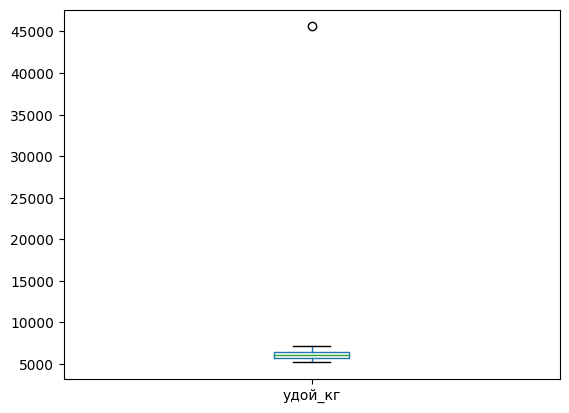

In [32]:
df_ferma_main['удой_кг'].plot.box()

In [33]:
df_ferma_main.sort_values(by='удой_кг', ascending=False)

,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
id,,,,,,,,,,,
17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет
71,7222,16.8,2157,0.95,Вис Бик Айдиал,Холмистое,Айдиал,3.70,3.076,вкусно,более_2_лет
136,7207,16.6,2343,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
297,7201,15.8,2077,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.072,вкусно,более_2_лет
295,7197,15.6,2241,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет
...,...,...,...,...,...,...,...,...,...,...,...
579,5235,12.2,1724,0.86,РефлешнСоверинг,Холмистое,Соверин,3.28,3.078,не вкусно,менее_2_лет
323,5215,13.1,1741,0.84,РефлешнСоверинг,Равнинное,Соверин,3.18,3.070,не вкусно,менее_2_лет
590,5213,12.1,2016,0.88,РефлешнСоверинг,Равнинное,Соверин,3.19,3.076,не вкусно,менее_2_лет


Выброс один, удаляем из выборки.

In [34]:
df_ferma_main.drop(inplace=True, index=17)

## Исследовательский анализ данных

In [35]:
cols_num = ['эке_энергетическая_кормовая_единица',
            'сырой_протеин_г',
            'спо_сахаро-протеиновое_соотношение',
            'жирность_%',
            'белок_%']
cols_cat = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']


### Графики количественных признаков с отображением категорий разными цветами

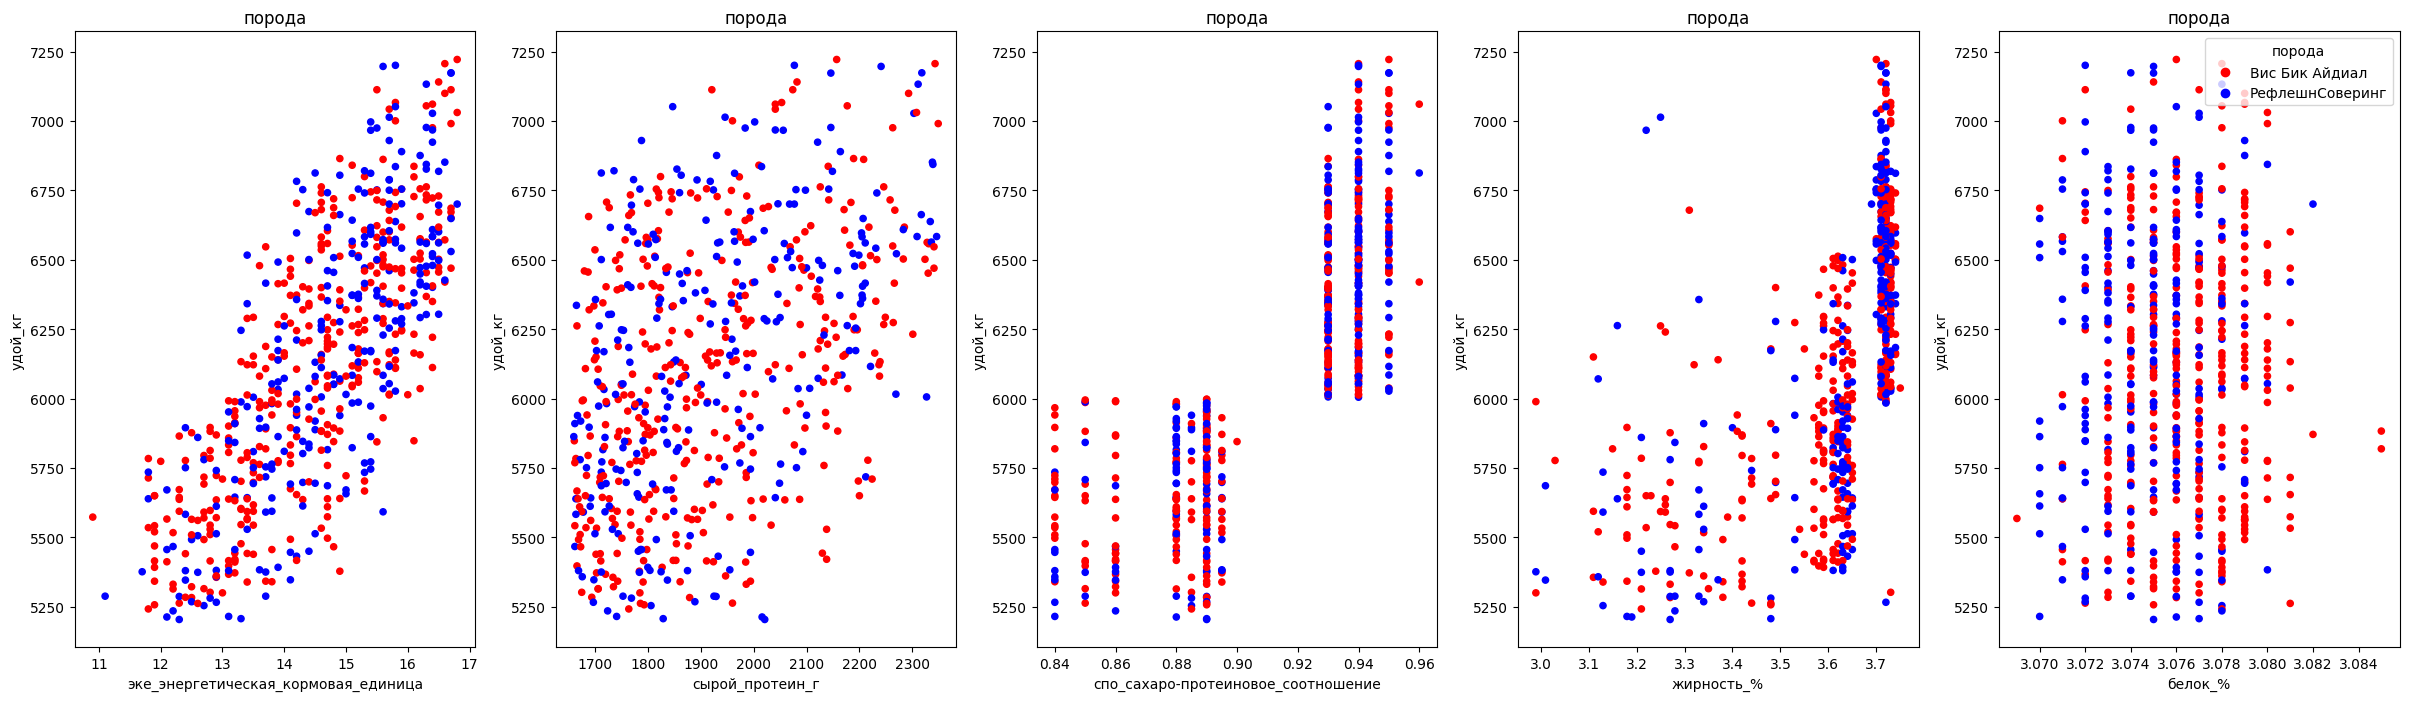

In [36]:
cmap = {'Вис Бик Айдиал': 'red', 'РефлешнСоверинг': 'blue'}
colors = [cmap.get(c, 'black') for c in df_ferma_main['порода']]
fig, axes = plt.subplots(nrows=1, ncols=len(cols_num), figsize=(30,8))
for i, col in enumerate(cols_num):
    df_ferma_main.plot(kind='scatter',
                       title='порода',
                       x=col,
                       y='удой_кг',
                       c=colors,
                       ax=axes[i])
for cat, color in cmap.items():
    plt.scatter([], [], label=cat, color=color)
plt.legend(title='порода')

При разной породе коровы удой не сильно зависит от состава корма

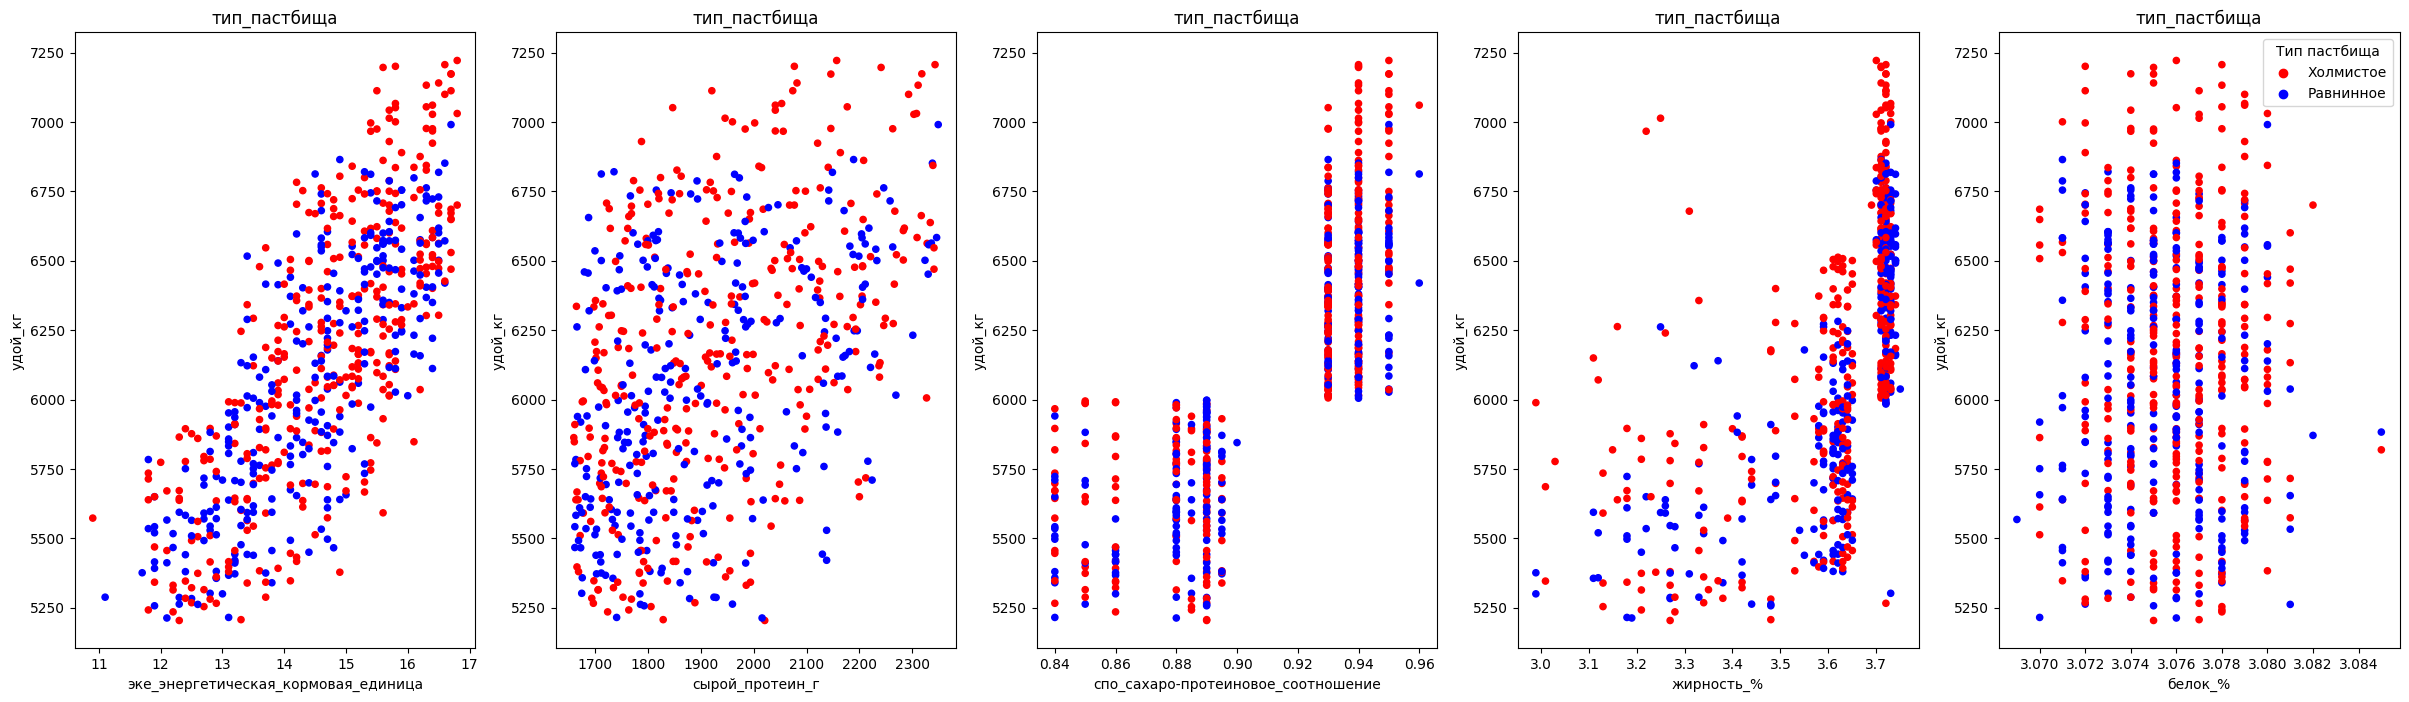

In [37]:
cmap = {'Холмистое': 'red', 'Равнинное': 'blue'}
colors = [cmap.get(c, 'black') for c in df_ferma_main['тип_пастбища']]
fig, axes = plt.subplots(nrows=1, ncols=len(cols_num), figsize=(30,8))
for i, col in enumerate(cols_num):
    df_ferma_main.plot(kind='scatter',
                       title='тип_пастбища',
                       x=col,
                       y='удой_кг',
                       c=colors,
                       ax=axes[i])
for cat, color in cmap.items():
    plt.scatter([], [], label=cat, color=color)
plt.legend(title='Тип пастбища')

В интересующей нас границе удоя (6000л) тип пастбища не сильно влияет на удой. Если бы нас интересовали коровы с максимальным удоем, то такие коровы пасутся только на холмистых пастбищах с максимальным значением ЭКЕ и СПО в корме.

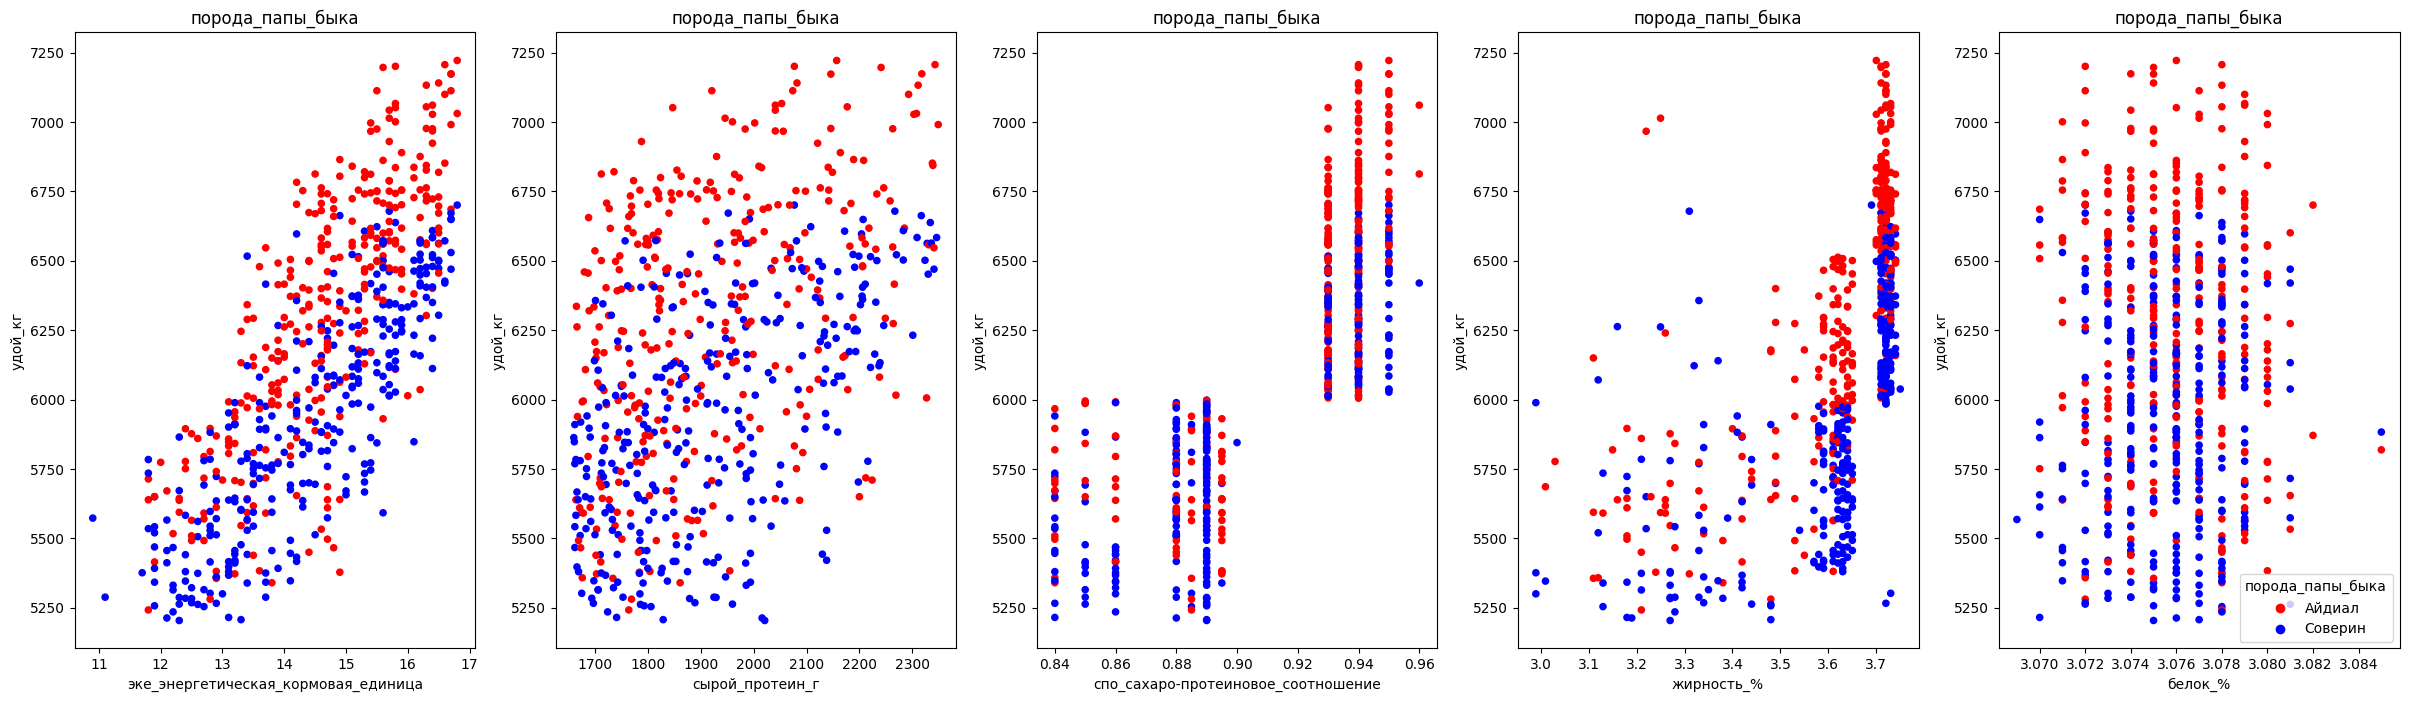

In [38]:
cmap = {'Айдиал': 'red', 'Соверин': 'blue'}
colors = [cmap.get(c, 'black') for c in df_ferma_main['порода_папы_быка']]
fig, axes = plt.subplots(nrows=1, ncols=len(cols_num), figsize=(30,8))
for i, col in enumerate(cols_num):
    df_ferma_main.plot(kind='scatter',
                       title='порода_папы_быка',
                       x=col,
                       y='удой_кг',
                       c=colors,
                       ax=axes[i])
for cat, color in cmap.items():
    plt.scatter([], [], label=cat, color=color)
plt.legend(title='порода_папы_быка')

Интересную картину показывает порода папы быка. Ранее было видно, что порода коровы не влияет на удой. Но при рассмотрении породы папы быка для каждой коровы видно, что в средем при одинаковом составе корма удой коров от Айдала выше, чем от Соверина. Есть предположение, что в датасете не корректно выставлены пары признаков "порода_коровы" vs "порода_папы_быка"

In [39]:
pd.crosstab(df_ferma_main['порода'], df_ferma_main['порода_папы_быка'])

порода_папы_быка,Айдиал,Соверин
порода,,
Вис Бик Айдиал,199,173
РефлешнСоверинг,118,138


Очень странно, что есть коровы каждой породы от быков обоих типов. Возможно тут есть ошибка. Нужна консультация с составителями датасетов.

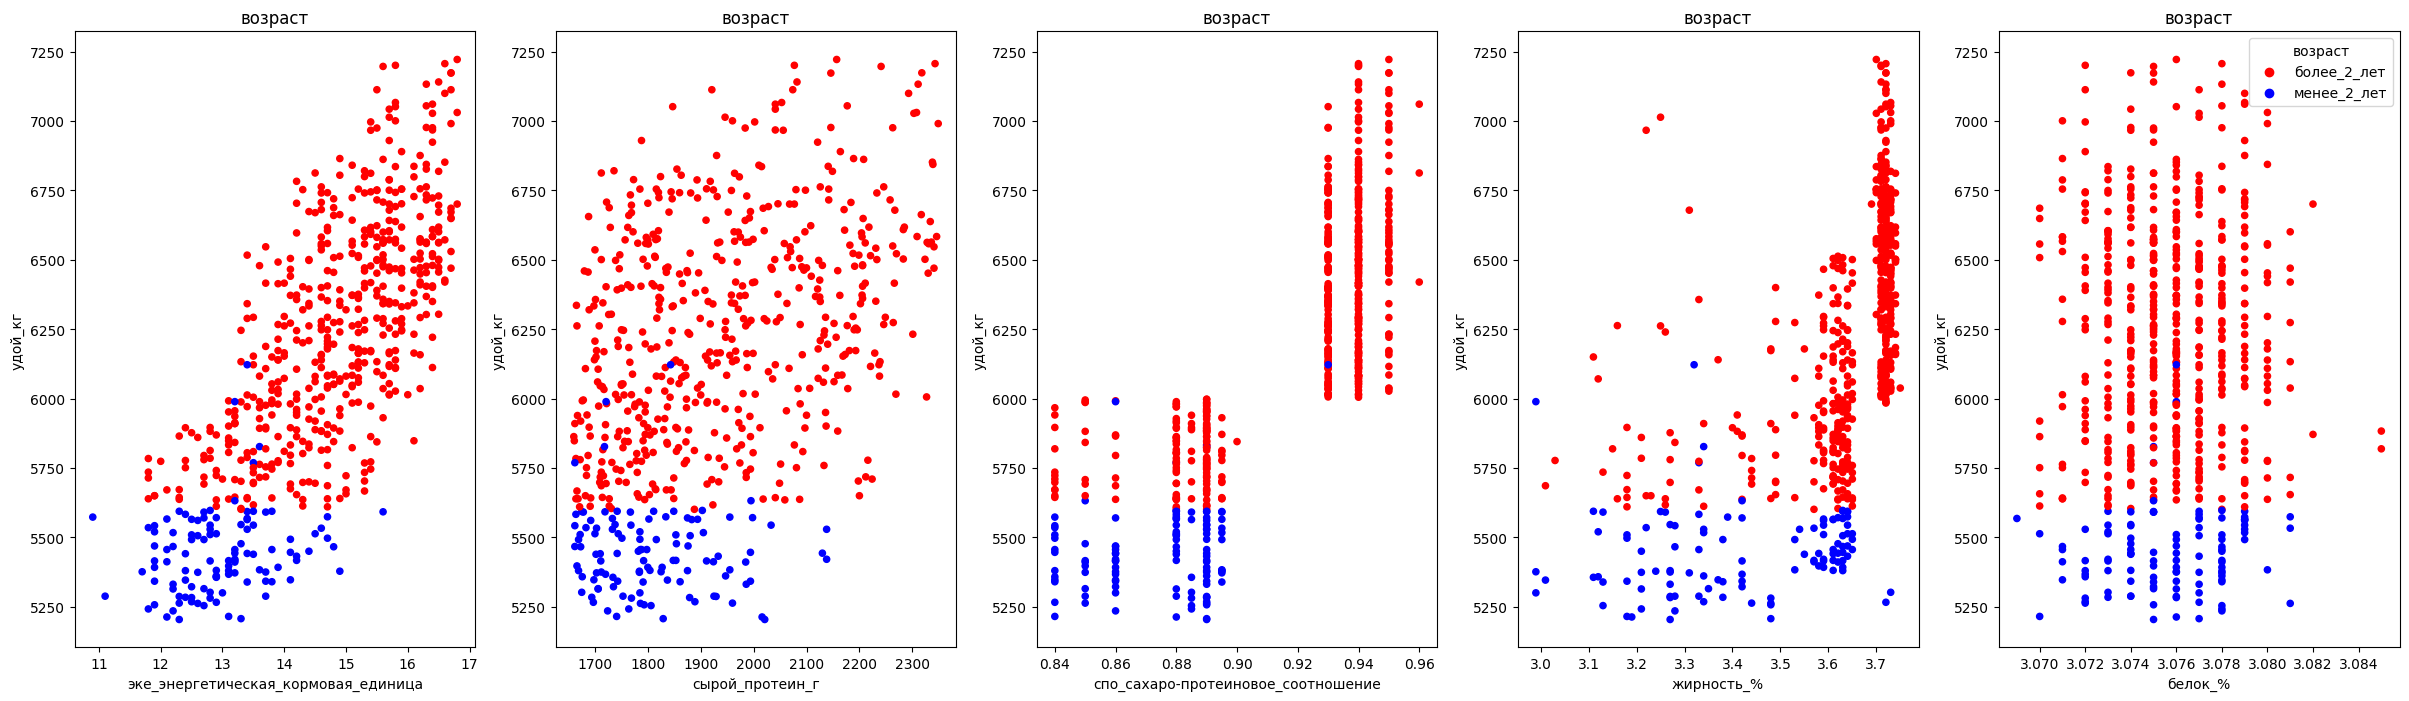

In [40]:
cmap = {'более_2_лет': 'red', 'менее_2_лет': 'blue'}
colors = [cmap.get(c, 'black') for c in df_ferma_main['возраст']]
fig, axes = plt.subplots(nrows=1, ncols=len(cols_num), figsize=(30,8))
for i, col in enumerate(cols_num):
    df_ferma_main.plot(kind='scatter',
                       title='возраст',
                       x=col,
                       y='удой_кг',
                       c=colors,
                       ax=axes[i])
for cat, color in cmap.items():
    plt.scatter([], [], label=cat, color=color)
plt.legend(title='возраст')

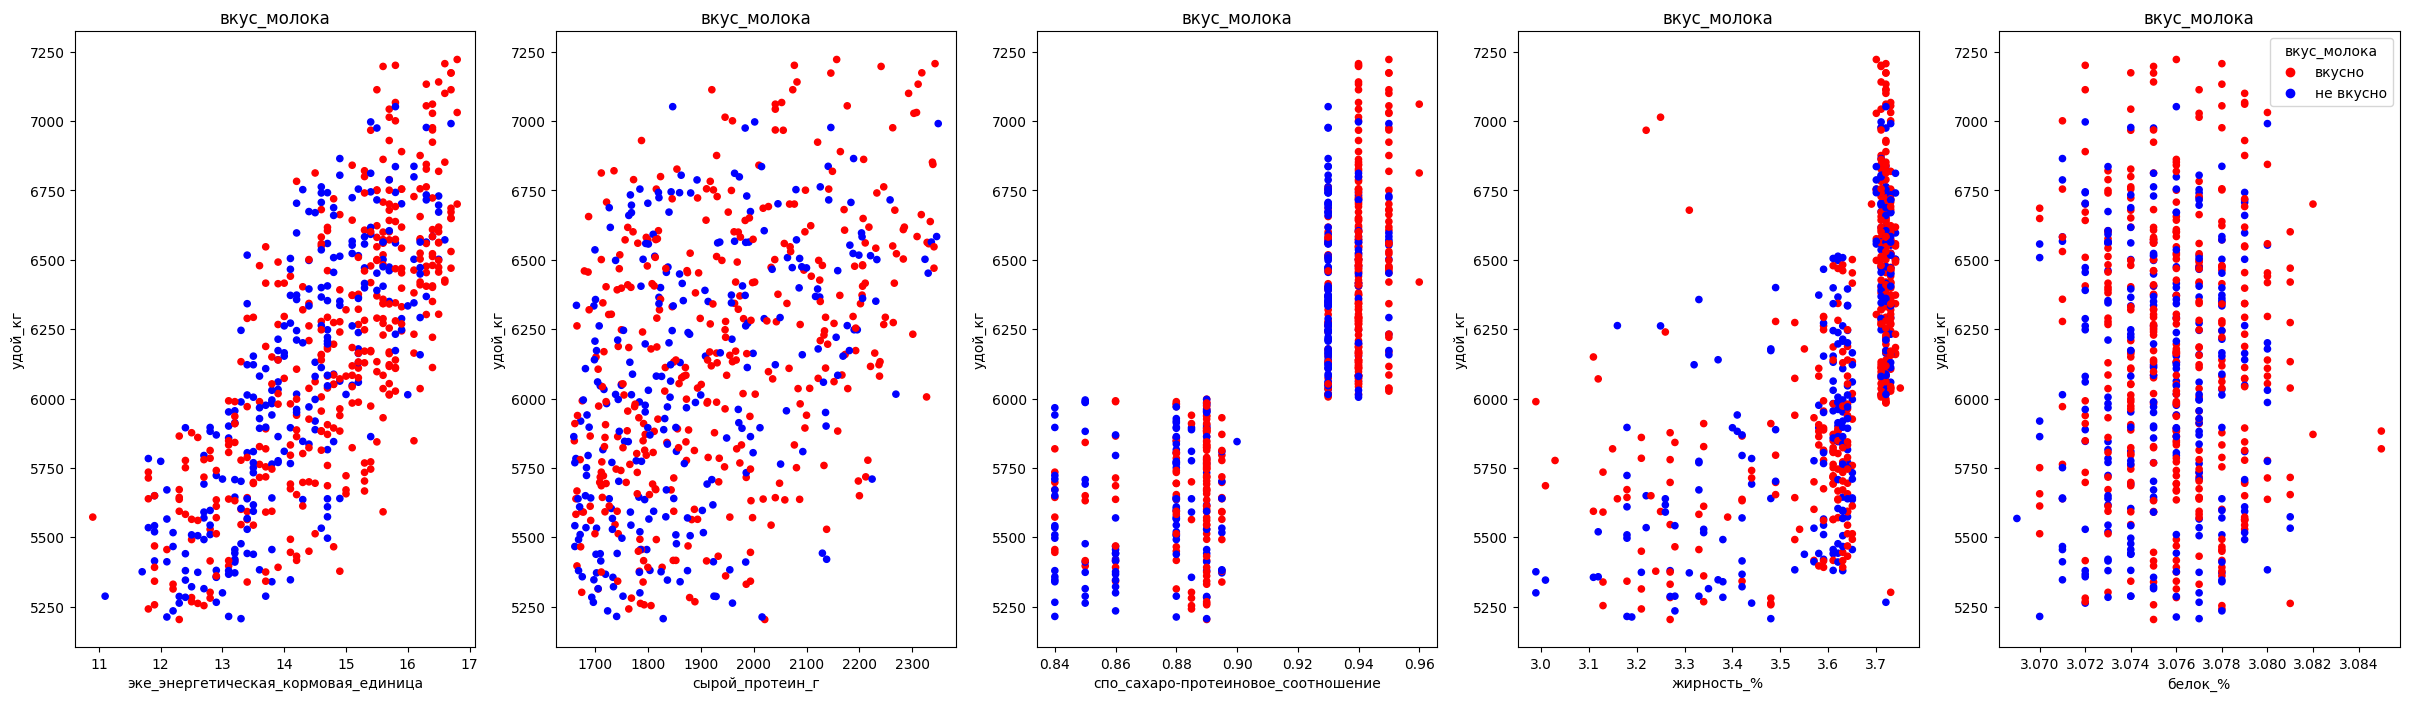

In [41]:
cmap = {'вкусно': 'red', 'не вкусно': 'blue'}
colors = [cmap.get(c, 'black') for c in df_ferma_main['вкус_молока']]
fig, axes = plt.subplots(nrows=1, ncols=len(cols_num), figsize=(30,8))
for i, col in enumerate(cols_num):
    df_ferma_main.plot(kind='scatter',
                       title='вкус_молока',
                       x=col,
                       y='удой_кг',
                       c=colors,
                       ax=axes[i])
for cat, color in cmap.items():
    plt.scatter([], [], label=cat, color=color)
plt.legend(title='вкус_молока')

На графике видно, что коровы с возрастом менее 2х лет не дают интересующий нас удой (6000). Эти коровы часто получают корм с меньшим содержанием ЭКЕ и СПО. А при аналогичном составе корма всё равно дают удой меньше кооров старше 2х лет.

Графики по числовы признакам показали дополнительное наблюдение. График СПО имеет три заметных диапазона: на двух удой не превышает итересующий нас показатель 6000 литров в год, на третьем диапазоне все коровы попадают в интересующий нас показатель удоя. Также подтверждена зависимоть жирности от уровня СПО, а значит есть зависимость удоя от жирности молока.
Также на удой значительно влияет порода_папы_быка - коровы породы Айдиал дают больше молока.  
Также выделяем возраст более 2-х лет - необходимый признак для коровы, для удовлетворения требованиям заказчика.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- проведен графический анализ взаимосвязей между факторами с использованием scatter plot, теперь у нас более глубокое понимание взаимосвязей в данных



 

- здорово что построен    scatter plot в разбивке по категориальным признакам 


 

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Посоветуй, пож-та, еще способ, как можно построить график зависимости двух числовых параметров с разбивкой по категориальным признакам. Мой метод родился в муках с ChatGPT :) его реализация мне понятна с большим трудом. Ниже моя первоначальная попатка вывести графики через циклы, но прикрутить туда категориальные признаки не получилось.
</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет: 



  
Можно использовать библиотеку seaborn  и с помощью[sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).  буквально двумя строчками строит scater_plot с разбивкой по категориальным признакам (hue - указываем категориальный признак по которому мы хотим сделать дополнителное разбиение,     facor - список количественных признаков, targ - целевая количественная переменная, cat - Список категориальных признаков)
    
    
            for category in cat:
                g = sns.PairGrid(df, hue = category, x_vars=factor, y_vars=targ)


    
Можно также из библиотеки  seaborn использовать .scatterplot   
    
    
    
    его реализация мне понятна с большим трудом
    
    
    
Попробуй построить один график с помощью     seborn.scatterplot,  там ничего сложного, он принимает три аргумента data=Наш dataset, x='Имя первого количества', y='Имя второго количественного признака'. А дальше можно усложнять добавляет циклы subplots

In [42]:

#def plot_numerical_data(df, numeric_cols, categorial_cols, target):
#    fig, axes = plt.subplots(nrows=len(categorial_cols), ncols=len(numeric_cols), figsize=(26,26))
#    for cat in range(len(categorial_cols)):
#        for num in range(len(numeric_cols)):
#            df.plot(kind='scatter',
#                    title=categorial_cols[cat],
#                    x=numeric_cols[num],
#                    y=target,
#                    ax=axes[cat][num])
          
#plot_numerical_data(df_ferma_main, cols_num, cols_cat, 'удой_кг')

In [43]:
df_ferma_main.groupby('порода')['удой_кг'].agg(['mean', 'median'])

,mean,median
порода,,
Вис Бик Айдиал,6099.405914,6112.0
РефлешнСоверинг,6164.566406,6178.5


In [44]:
df_ferma_main.groupby('тип_пастбища')['удой_кг'].agg(['mean', 'median'])

,mean,median
тип_пастбища,,
Равнинное,6056.287770,6061
Холмистое,6181.314286,6171


In [45]:
df_ferma_main.groupby('порода_папы_быка')['удой_кг'].agg(['mean', 'median'])

,mean,median
порода_папы_быка,,
Айдиал,6310.899054,6370
Соверин,5937.469453,5919


In [46]:
df_ferma_main.groupby('возраст')['удой_кг'].agg(['mean', 'median'])

,mean,median
возраст,,
более_2_лет,6270.735521,6267.0
менее_2_лет,5444.245455,5435.5


Из категориальных признаков "порода", "тип_пастбища", "порода_папы_быка", "возраст" занчителрьное влияние на удой оказывают "возраст" и "порода_папы_быка"

In [47]:
df_ferma_main.head()

,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
id,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


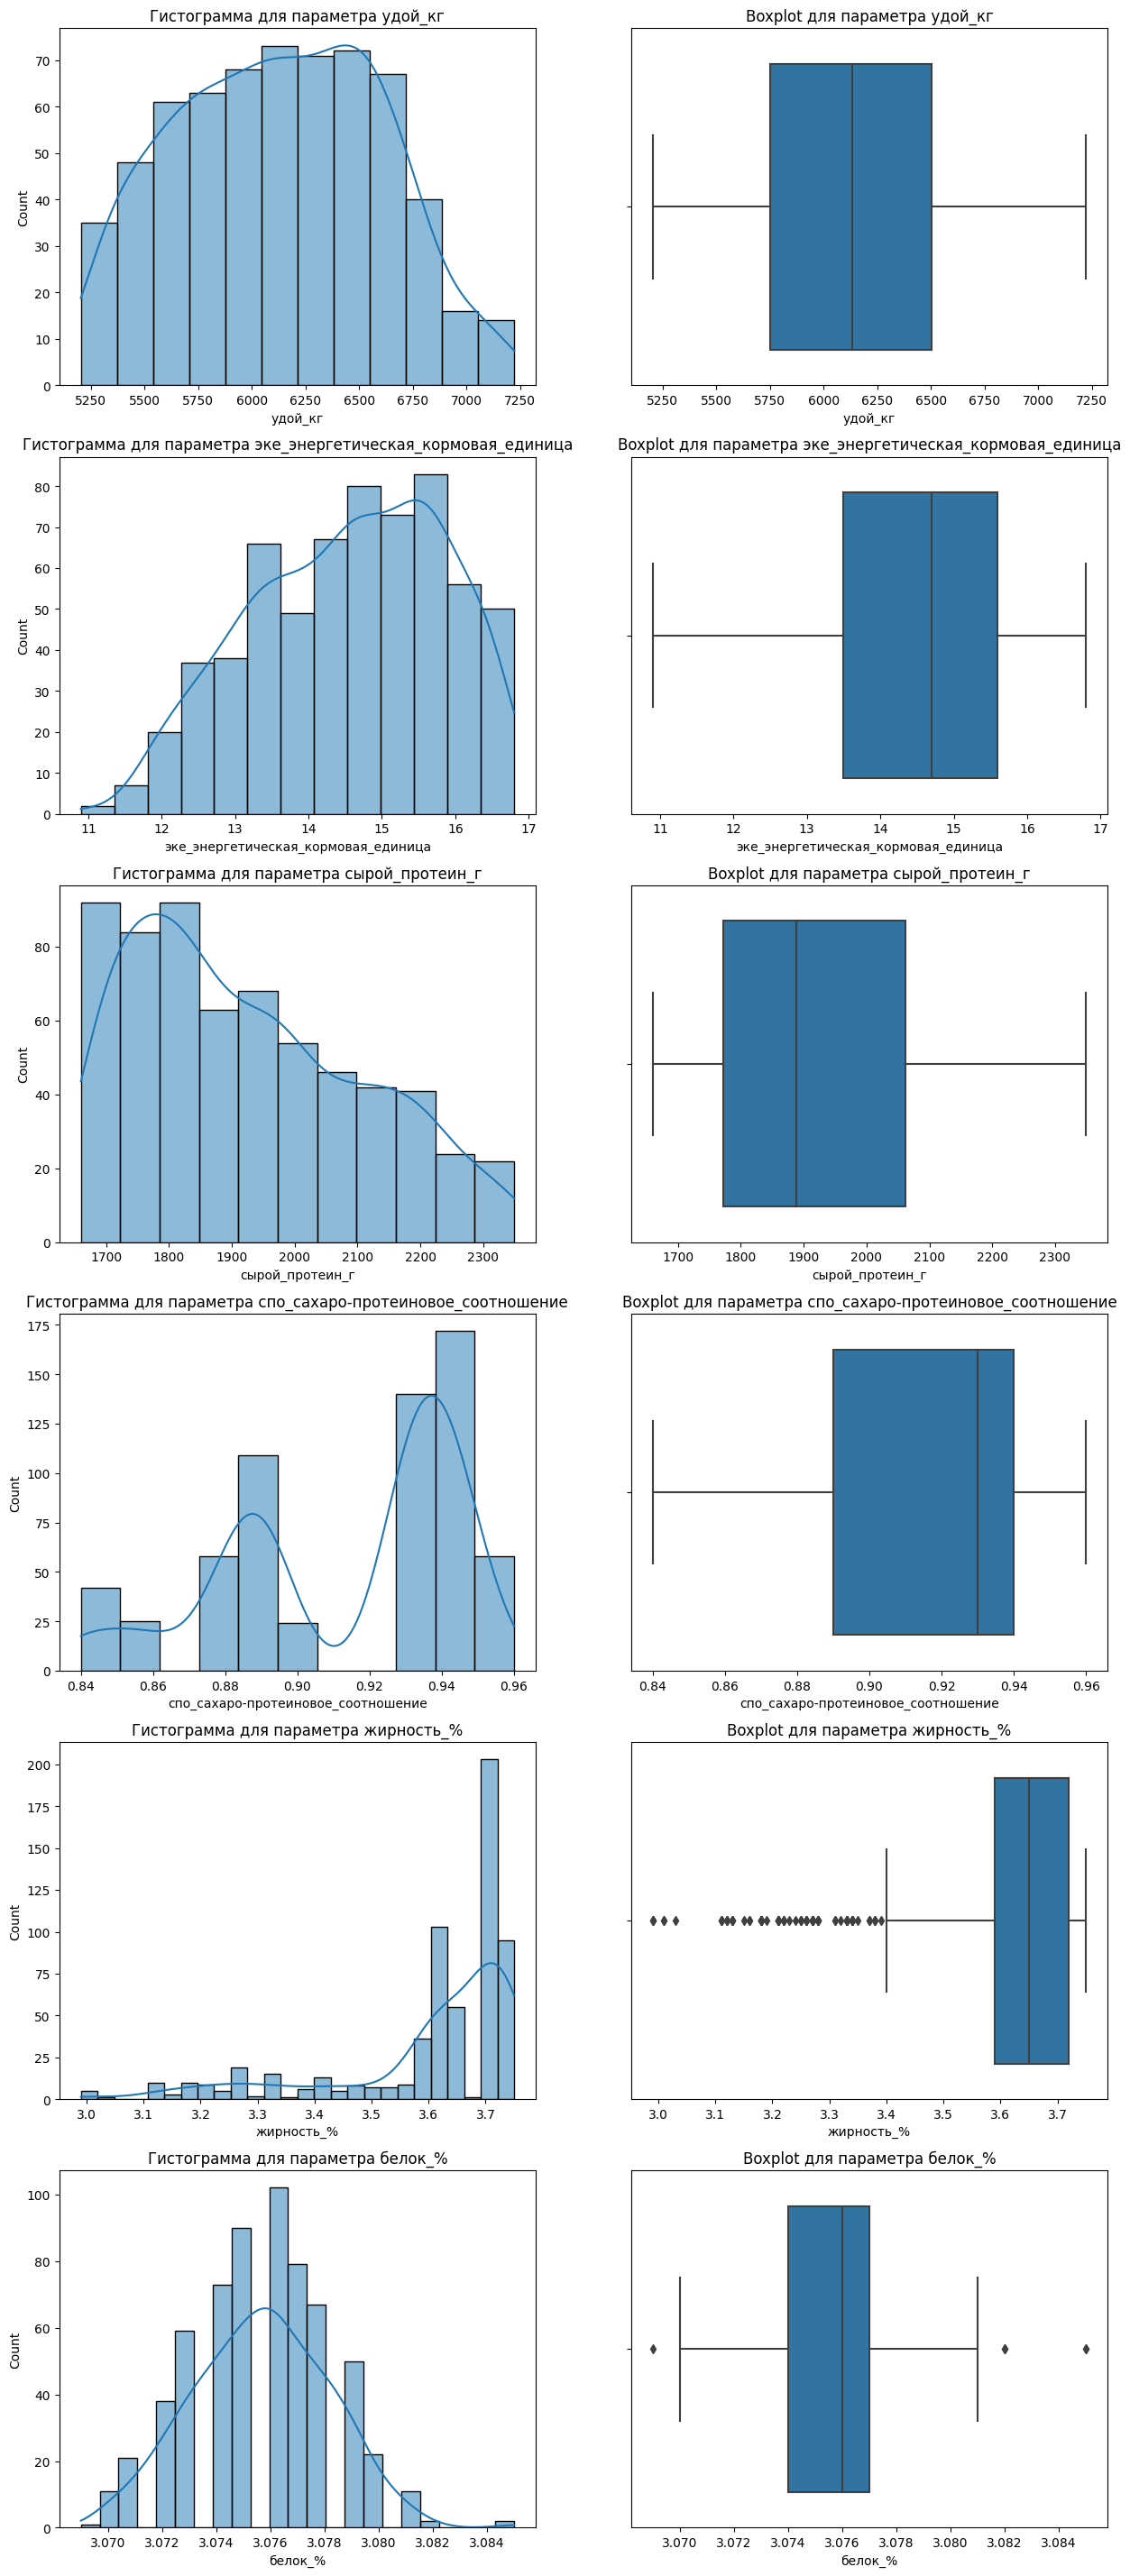

In [48]:
hist_boxplot(df_ferma_main)

### Выводы по графикам количественных признаков

* Большинство признаков распределены не нормально. Нормально распределен только показатель белка в молоке с небольшим смещением вправо.
* Значительное количество выбросов есть только у параметра жирность молока.
* Гистограммы жирности и СПО показывают бимодальное распредление.
* Для проверки параметров на мультиколлинеарность будем использовать корреляцию Спирмена



<div class="alert alert-danger">
<font size="5">
<b>Комментарий ревьюера</b></font>





Ошибка ❌:



- Для количественных признаков стоит использовать два вида графиков 

Гистограмма: Гистограмма позволяет вам визуально оценить форму распределения данных. Она особенно полезна для выявления бимодальности - наличия двух характерных мод в данных. Гистограмма позволяет увидеть, есть ли две выраженные вершины (пики) в данных, что может указывать на наличие двух различных групп в данных.

Ящик с усами (Boxplot): Ящик с усами отлично подходит для выявления выбросов и оценки разброса данных. Он обнаруживает асимметрии и позволяет оценить наличие выбросов, которые не всегда легко заметить на гистограмме.

    
 

- Строим соответствующие графики для всех признаков из всех датасетов    
    
    

- Графики построили и сразу пишем вывод по увиденному.  Иначе для чего всё это?! А делали мы это конечно не просто так, а потому что если в зависимости от распределения корреляцию считаем или Пирсоном или Спирменом. А корреляцию считаю для того чтобы в том числе провести проверку на мультиколлинераность.  А это нам важно потому что у нас линейные модели которые чувствительны к ней. Вот и получается что гистограмму мы строим не просто так, а чтобы в конечном итоге лучше обучить нашу модель
А например по графику таргета мы можем заметить дисбаланс, это может также может быть важной информацией, если мы хотим обучить нашу модель получше


    
<div class="alert alert-warning">


Совет 🤔:


 
- для красоты восприятия рекомендую использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/):  Для каждого признака, в одном столбце график - гистограмма, в другом график - boxplot
 


 
- а ещё бы тебе советовал использовать библиотеку    [seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/), она строит  симпатичнее и проще matplotlib. matplotlib вам давали потому что это как научиться ездить на механике - если можешь на ней то сможешь и на автомате (seaborn)


- советую написать функцию, смотри сколько однотипного кода.  Ты можешь создать универсальную функцию (к чем и надо стермиться),  которую будешь использовать во всех дальнейших проектах - очень удобно.  Ведь мы во всех проектах  строим графики для категориальных и количественных признаков
    
    
    
- Если хочешь убрать AxesSubplot:xlabel..  то ставь в конце `;` или пропиши plt.show()

    

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Сделал попарные графики гистограммы и ящика с усами. Написал выводы о форме распреления признаков.Написал функцию hist_boxplot (разместил под импортами). Раскрой, пожалуйста, подробнее про дисбаланс к текущей задаче - не монимаю как его тут использовать.
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



у нас дисбаланс в таргете, то есть нулей и единичек не 50 на 50. Это может привести к тому что модель в ходе обучения научиться отдавать предпочтение более частному классу. Чтобы этого не было мы можем попробовать учесть дисбаланс при обучении модели с помощью class_weihgt (В этом случае за ошибки на более редком классе штрафовать модель будет больше) или можно сбалансировать тренировочную выборку (Сделать так чтобы нулей единичек было одинаковое количество). Это два классических подхода, конечно есть подходы и сложнее (SMOTE)

## Корреляционный анализ

### Матрица корреляции количественных признаков

In [49]:
corr_matrix_spearman = df_ferma_main.corr(method='spearman')

In [50]:
corr_matrix_pearson = df_ferma_main.corr()

In [51]:
corr_matrix_spearman = np.round(corr_matrix_spearman, 2)
corr_matrix_pearson = np.round(corr_matrix_pearson, 2)

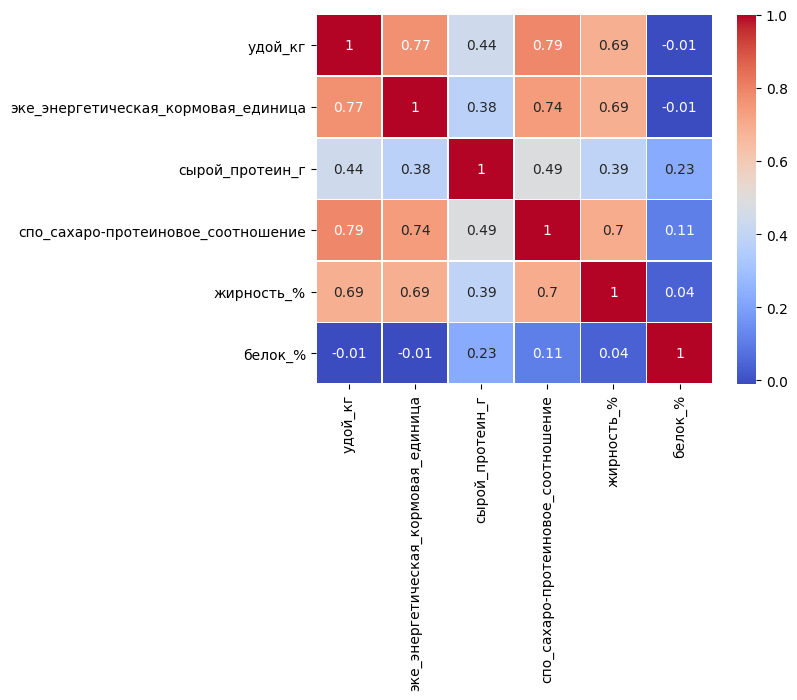

In [52]:
sns.heatmap(corr_matrix_spearman, annot=True, linewidths=.5, cmap='coolwarm');

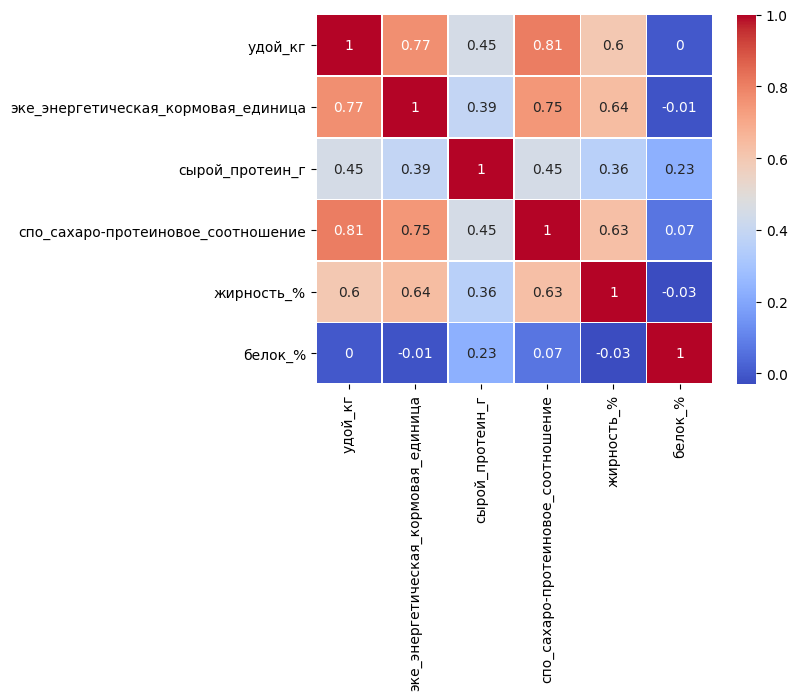

In [53]:
sns.heatmap(corr_matrix_pearson, annot=True, linewidths=.5, cmap='coolwarm');

interval columns not set, guessing: ['удой_кг', 'эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 'спо_сахаро-протеиновое_соотношение', 'жирность_%', 'белок_%']


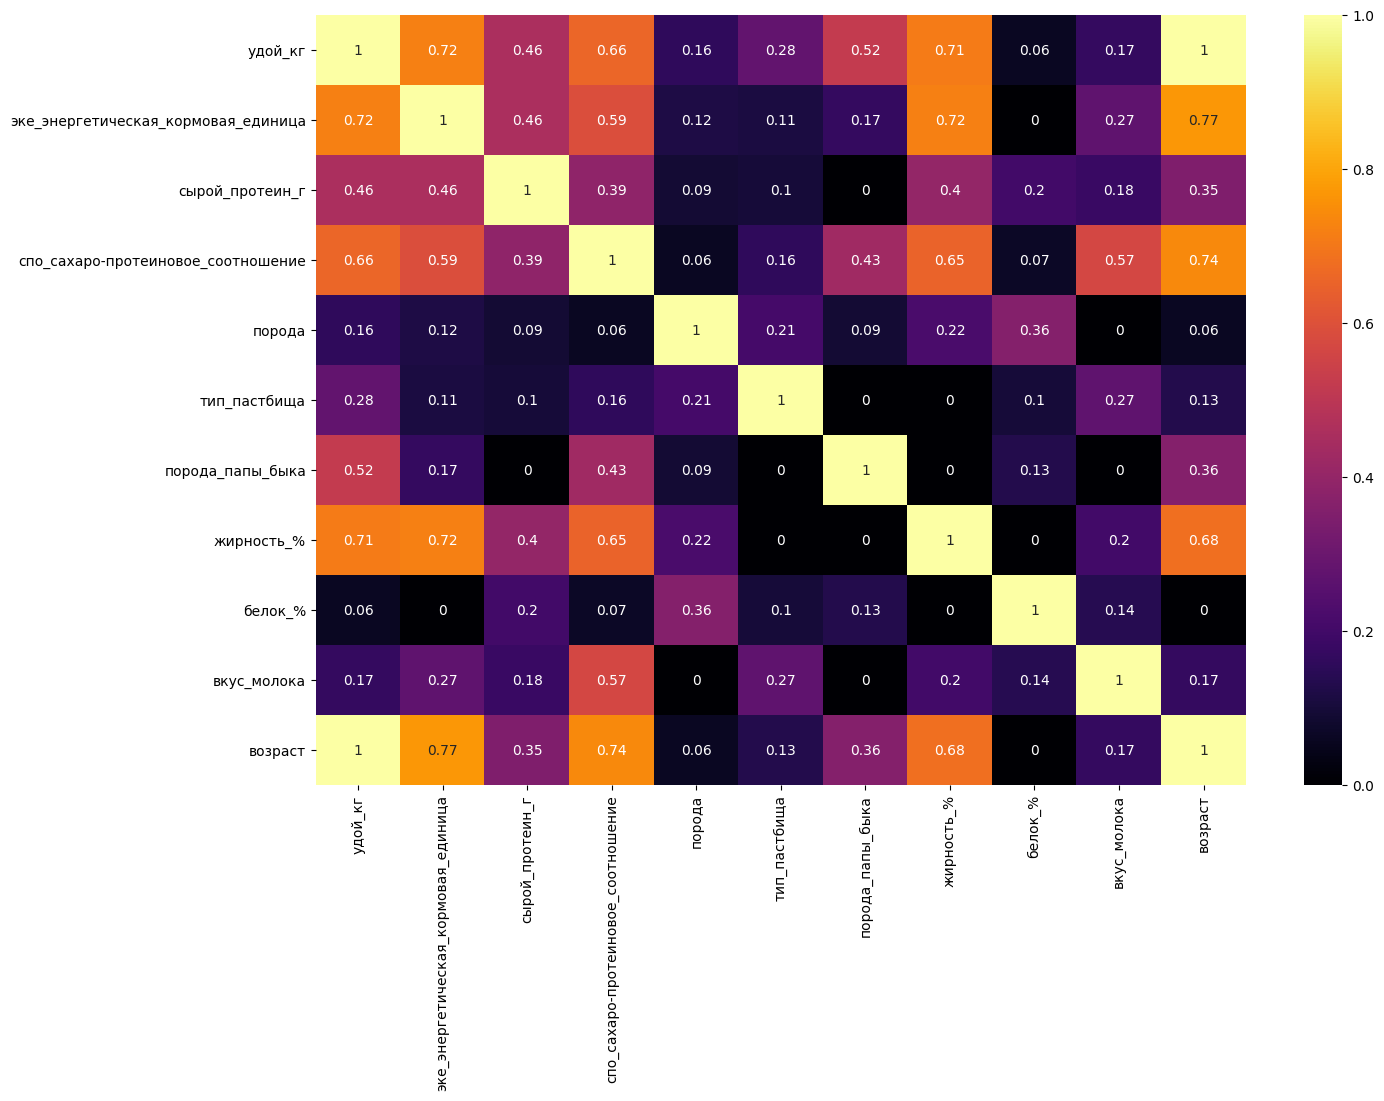

In [54]:
phik_matrix = df_ferma_main.phik_matrix()
phik_matrix = np.round(phik_matrix, 2)
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, cmap='inferno');

#phik_corr_matrix = phik_matrix(df_ferma_main)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


    

   

    
- перед тем как считать корреляцию Пирсона (по умолчанию .corr() считает его), стоило посмотреть как у нас распределены наши количественные признаки. Потому что коэффициент Пирсона мы используем в случае нормальности распределения данных, ведь этот коэффициент чувствителен к отклонениям от нормальности (и к выбросам кстати), что может исказить результаты анализа (в случаи ненормальности используем Спирмена)    
    
 
    
    
 


<div class="alert alert-warning">


Совет: 

 

- почему бы для красоты восприятия сверху не наложить heatmap (там ещё палитру можно поменять, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет)    
    

    

- есть такая библиотека [phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7), ее особенности: работа с разными типами данных, в том числе категориальными, учет нелинейных отношений, плюс отличная интерпретация и визуализация. Может быть полезно в будущем
    
    

- к этому времени я бы уже убрал id, ведь это  номер строки и вряд ли он может быть связан с таргетом (если конечно там нет какой то временной составляющей). Но раз посчитал можешь педложить версию такой высокой корреляции?
    

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Ориентируемся на корреляцию Спирмена, но для сравнения построил еще матрицу корреляции Пирсона. Сильных различий в нашем примере не заметил. Добавил выводы и для интереса построил phik матрицу
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 phik



(Но посоветовал бы задать interval_columns, которому указываем количественные признаки.  Иначе phik может напутать, где у нас количественные а где категориальные признаки)


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Здесь оставляем ответы на вопрос
    
- Присутствует ли у нас мультиколлинеарность    
    
    
- Присутствует ли у нас нелинейной связи между признаками и удоем (для этого используем scatter)    

### Выводы

* Мультиколлинеарные признаки не обнаружены. Высокую коррекляцию между собой показывают ЭКЕ и СПО, но не достаточную, чтобы нужно было удалить один из признаков.
* Наблюдается высокая корреляция удоя с "эке_энергетическая_кормовая_единица", "спо_сахаро-протеиновое_соотношение" и умеренная коррекляция по признаку "сырой_протеин_г". 
* Жирность как и удой заметно коррелирует с показателями питания коровы: "эке_энергетическая_кормовая_единица", "спо_сахаро-протеиновое_соотношение".   
* На мой вгляд корреляция жирности и удоя объясняется не их корреляцией между собой, а тем, что оба показателя зависят от состава корма коровы (ЭКЕ и СПО).
* Ни на одном из графиков зависимости удоя от количественных признаков я не наблюдаю яркой линейной зависимости. Только ЭКЕ показывает что-то похожее на линию, но по условию задачи даже его мы потом возводим в квадрат, чтобы "убрать нелинейность"

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Мультиколинеарности действительно нет. 

    
    
По поводу нелинейности - удой и СПО имеет явную нелинейную связь, с эке не так очевидно, при большом желании можно увидеть квадратичную зависимость  (Это можно уточнить математически)  

## Обучение модели линейной регрессии

### Модель_1

In [55]:
df_ferma_main.head()

,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
id,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Подготовка данных:
* для обучения линейной регрессии исключим признаки: порода, вкус_молока. Точечный график показал, что удой не зависит от породы коровы. Вкус_молока является целевым признаком для задачи классификации. 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



    


- когда строишь модель для предсказания удоя молока обрати внимание на данные которые ты используешь в качестве признаков.   Всё-таки считается что в этом проекте не нужно включать в  факторы "жирность" и "белок" (и вкус само собой). Они представляют собой характеристики самого молока, которые мы будем учитывать при анализе его качества. То же самое относится к "вкусу молока" — это критерий качества, который не влияет на удой и должен рассматриваться только в следующей модели. Фокусируйся на факторах, которые могут действительно влиять на количество продуцируемого молока, когда много признаков это не всегда хорошо, а когда они некачественные, линейной модели трудно найти стоящие закономрености
    
    
(Хотя понимаю что это вопрос дискуссионный)    
    

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Ниже поправил. Оставил породу. Убрал жирность_%, белок_%, вкус_молока	
</div>

In [56]:
RANDOM_STATE = 777

In [57]:
X = df_ferma_main.drop(['удой_кг', 'жирность_%', 'белок_%','вкус_молока'], axis=1)
y = df_ferma_main['удой_кг']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
cat_cols = X.select_dtypes(include=[object]).columns
cat_cols

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст'], dtype='object')

In [59]:
num_cols = X.select_dtypes(exclude=[object]).columns
num_cols

Index(['эке_энергетическая_кормовая_единица', 'сырой_протеин_г',
       'спо_сахаро-протеиновое_соотношение'],
      dtype='object')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Я бы рекомендовал вывести на печать свои количественной категориальные Столбцы, не нужно превращать проект чёрный ящик


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Выше добавил просмотр содержания переменных с категориальными и числовыми признаками.
</div>

In [60]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [61]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(X_train[cat_cols])
ohe_cols = encoder.get_feature_names()


In [62]:
X_train[ohe_cols] = encoder.transform(X_train[cat_cols])
X_test[ohe_cols] = encoder.transform(X_test[cat_cols])
X_train = X_train.drop(cat_cols, axis=1)
X_test = X_test.drop(cat_cols, axis=1)

In [63]:
lr_model_1 = LinearRegression()

In [64]:
lr_model_1.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = lr_model_1.predict(X_test)

In [66]:
r2_metric = r2_score(y_test, y_pred)
r2_metric

0.7993430619227251

Функция для split_scale_ohe

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍  






<div class="alert alert-warning">


 Совет:

    
 

Чтобы сделать код компактнее можно  оформить дополнительную функцию. Как видишь в этом проекте мы не делаем перебора гиперпараметров, и не используем разные модели, так почему бы не создать функцию, которая будет принимать разный набор признаков, а дальше делать одно и то же (сплит, шкалирование + OHE, обучение модели, прогноз модели). Вместо того чтобы три раза писать простыню из кода, мы напишем простыню один раз, а затем три раза применим функцию одной строкой (кстати советую в return кроме модели добавить вывод Scaler и Encoder, ведь они нам понадобятся для того чтобы сделать transform на данных из cow_buy) . В проектах где будет перебор гиперпараметров и мы будем использовать разные модели, в такой функции необходимости не будет, но в этом проекте, я думаю мы здорово улучшим восприятие кода
    
И парочку cоветов по оформлению функций:    
    
- Для таких простых функций острой необходимости нет, код говорит сам за себя, но если хочешь попрактиковаться, можешь включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru).  Можно оставить описание того что делает эта функция, а затем попробовать вызвать что та напишешь с помощью
    
    
    print(my_function.__doc__)
    
или    
    
    help(my_function)


- Код создания функции обычно оставляет под импортами, так их легче контролировать





    
    


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Добавил под импортом функцию "split_scale_ohe_linreg". Приходится возвращать из функции y_test и y_pred, т.к. эти переменные существуют только внутри функции, и нужны для расчета метрик - это правильно? Код без функции оставил для проверки, что метрика r2 не изменилась. А потом еще чтобы проанализировать корректно важность коэффициентов, понадобилось вернуть из функции список признаков после ohe, т.к. закодированный датасет есть тоже только в функции.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



    Приходится возвращать из функции y_test и y_pred, т.к. эти переменные существуют только внутри функции, и нужны для расчета метрик - это правильно? 

    

Вполне нормально выглядит.  Можно было в функцию сразу и расчёт метрик засунуть, но  это уже дело     
    
    
    
    А потом еще чтобы проанализировать корректно важность коэффициентов, понадобилось вернуть из функции список признаков после ohe, т.к. закодированный датасет есть тоже только в функции.
    
    
    
👍    

In [67]:
model_lr_1, y_test_1, y_pred_1, scaler_1, encoder_1, columns_3 = split_scale_ohe_linreg(X, y, num_cols, cat_cols)

In [68]:
r2_metric_1 = r2_score(y_test_1, y_pred_1)
r2_metric, r2_metric_1


(0.7993430619227251, 0.7993430619227251)

Метрика r2 равная 0.7993 говорит о том, что наша модель предсказывает в 8 случаях из 10 лучше, чем модель, предсказывающая только средние значения.

In [69]:
residuals_1 = y_test_1 - y_pred_1

In [70]:
residuals_1.head()

id
489    174.622197
58      27.567159
277   -259.449635
90    -266.713693
114   -207.637720
Name: удой_кг, dtype: float64

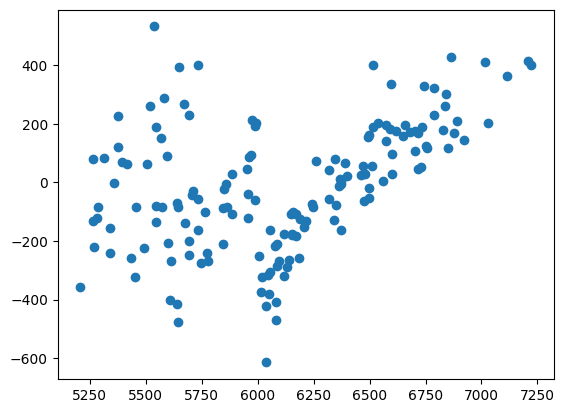

In [71]:
plt.scatter(y_test, residuals_1)

(array([ 1.,  6., 11., 25., 31., 26., 27., 17., 11.,  2.]),
 array([-614.69642851, -500.02285125, -385.34927399, -270.67569674,
        -156.00211948,  -41.32854222,   73.34503504,  188.0186123 ,
         302.69218955,  417.36576681,  532.03934407]),
 <BarContainer object of 10 artists>)

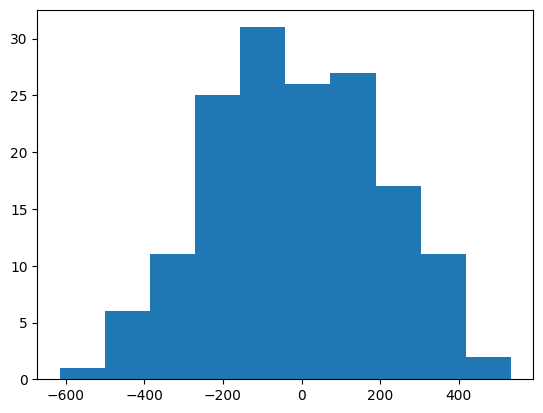

In [72]:
plt.hist(residuals_1, bins=10)

Начиная с 6000л. остатки линейно начинают увеличиваться. Модель плохо обучилась предсказвать удой значительно больше 6000л, чем больше удой на тесте, тем больше разница. Допускаю, что это из-за недостатка данных по коровам с удоем 6500+  
Распределелние остатков схоже с нормальным, немного смещено вправо, из-за плохо способности нашей модели предсказывать большой удой.


    
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

    
    
- есть графический анализ остатков и вывод о недостаточной гомоскедастичности на месте     
     
    
    
    


### Модель_2

In [73]:
X['спо_сахаро-протеиновое_соотношение'] = X['спо_сахаро-протеиновое_соотношение'].apply(lambda x: 0 if x<0.92 else 1).astype('object')
X['эке_энергетическая_кормовая_единица'] = X['эке_энергетическая_кормовая_единица'] ** 2

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
cat_cols = X.select_dtypes(include=[object]).columns
cat_cols

Index(['спо_сахаро-протеиновое_соотношение', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'возраст'],
      dtype='object')

In [75]:
num_cols = X.select_dtypes(exclude=[object]).columns
num_cols

Index(['эке_энергетическая_кормовая_единица', 'сырой_протеин_г'], dtype='object')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




А тут у меня подозрение что спо_сахаро-протеиновое_соотношение посчиталась как количественный признак, ты же его не перевёл object

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Поправил: добавил .astype('object') при приобразование к 1/0
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


In [76]:
model_lr_2, y_test_2, y_pred_2, scaler_2, encoder_2, columns_2 = split_scale_ohe_linreg(X, y, num_cols, cat_cols)

In [77]:
r2_metric_2 = r2_score(y_test_2, y_pred_2)
r2_metric_1, r2_metric_2

(0.7993430619227251, 0.8224419554271336)

In [78]:
residuals_2 = y_test_2 - y_pred_2

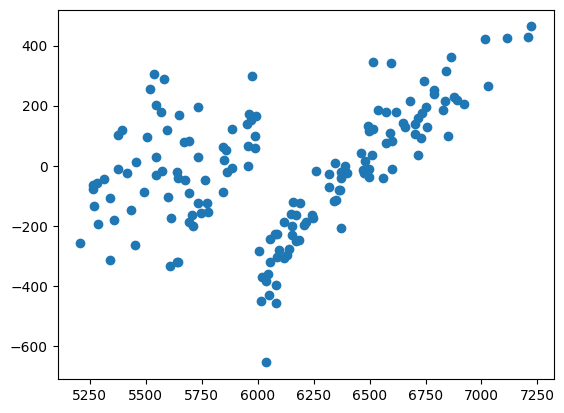

In [79]:
plt.scatter(y_test_2, residuals_2)

(array([ 1.,  2.,  9., 15., 27., 36., 26., 26., 10.,  5.]),
 array([-655.1813691 , -543.2885313 , -431.39569349, -319.50285568,
        -207.61001788,  -95.71718007,   16.17565774,  128.06849554,
         239.96133335,  351.85417115,  463.74700896]),
 <BarContainer object of 10 artists>)

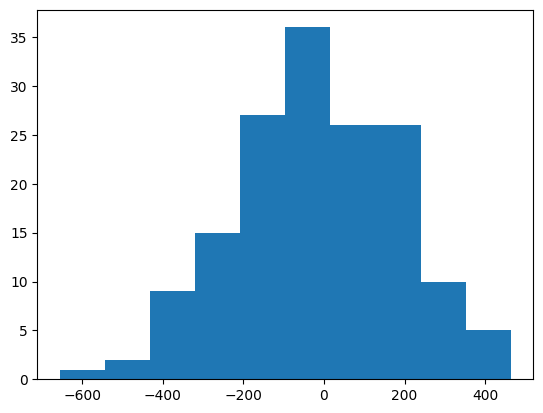

In [80]:
plt.hist(residuals_2, bins=10)

По метрике r2 модель улучшилась на 3%. На графиках заметно, что дисперсия стала меньше.

### Модель_3

In [81]:
X.head()
X.shape

(628, 7)

In [82]:
df_ferma_dad = df_ferma_dad.set_index('id')

In [83]:
df_ferma_dad.head()

,имя_папы
id,
1,Буйный
2,Соловчик
3,Барин
4,Буйный
5,Барин


In [84]:
X = X.join(df_ferma_dad['имя_папы'], how='left')

In [85]:
X.head()

,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы
id,,,,,,,,
1,201.64,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
2,163.84,2138,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик
3,196.00,1854,0,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
4,153.76,2012,0,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
5,163.84,1675,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин


In [86]:
cat_cols = X.select_dtypes(include=[object]).columns
cat_cols

Index(['спо_сахаро-протеиновое_соотношение', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'возраст', 'имя_папы'],
      dtype='object')

In [87]:
num_cols = X.select_dtypes(exclude=[object]).columns
num_cols

Index(['эке_энергетическая_кормовая_единица', 'сырой_протеин_г'], dtype='object')

In [88]:
model_lr_3, y_test_3, y_pred_3, scaler_3, encoder_3, columns_3 = split_scale_ohe_linreg(X, y, num_cols, cat_cols)

In [89]:
r2_metric_3 = r2_score(y_test_3, y_pred_3)
r2_metric_1, r2_metric_2, r2_metric_3

(0.7993430619227251, 0.8224419554271336, 0.8341767560030129)

In [90]:
residuals_3 = y_test_3 - y_pred_3

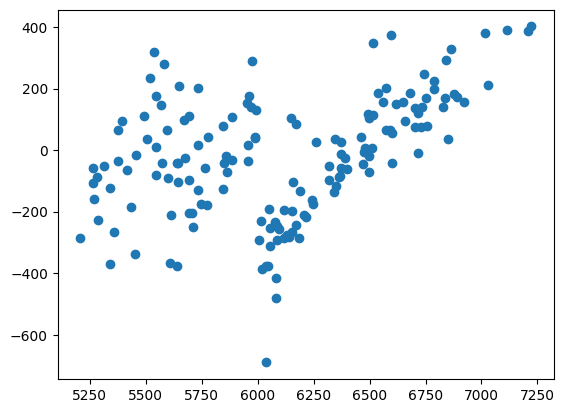

In [91]:
plt.scatter(y_test_3, residuals_3)

(array([ 1.,  1.,  7., 13., 20., 33., 30., 31., 12.,  9.]),
 array([-689.86481639, -580.72852921, -471.59224202, -362.45595484,
        -253.31966765, -144.18338047,  -35.04709328,   74.08919391,
         183.22548109,  292.36176828,  401.49805546]),
 <BarContainer object of 10 artists>)

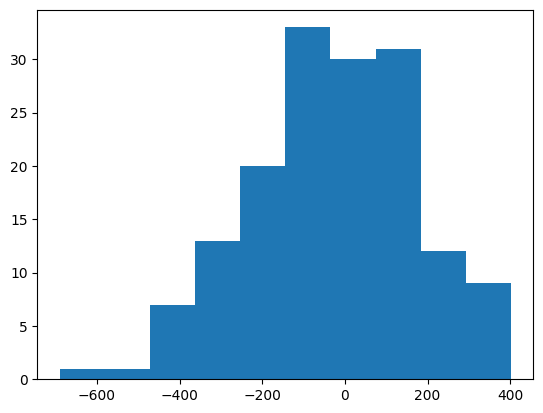

In [92]:
plt.hist(residuals_3, bins=10)

Метрика r2 стала еще лучше. На графике распредления остатков значительных изменений не видно, кроме одного выброса.  
Для предсказания использем модель с наилучшем показателем r2: model_lr_3


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

    
    
    
- согласно заданию используем следующие метрики R2, MSE, MAE, RMSE. Какой-то универсальный метрики нет, поэтому всегда лучше использовать набор,  и не забываем оформить это в функцию    
   

        

<div class="alert alert-warning">



    
    
Совет 🤔:

    
 
    
    
- Предлагаю подсчёт Метрик оформить в виде функции, ведь это будет очень удобно -  во все метрики мы подаём одни и те же два аргумента, вот и отличная возможность сделать наш код лаконичней: один раз пишем функцию, а затем одной строчкой её вызываем, для всех наших моделей    
    
 
    

 


- Хорошо бы сюда добавить как модель оценивает важность того или иного признака, это может быть отличной иллюстрацией того насколько удачно мы сгенерировали новые признаки. Это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html). А ещё есть такая интересная библиотека shap — позволяет детально изучить работу модели, в том числе оценить важность признаков, при этом не привязана к работе конкретного алгортима прогнозирования. Вот статья с описанием ее работы — https://habr.com/ru/articles/428213/ и детальный разбор графиков - https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137  . Подробнее об этой библиотеке будет следующим проекте



        

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Добавил функцию под импортом для расчета основных метрик. Ниже сделал расчет для всех трех моделей и добавил вывод. Посмотрел на значимость коэффициентов. Пишет 'LinearRegression' object has no attribute 'feature_importances' =)
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Так и есть feature_importances это для моделей на основе деревьев решений. Для линейной и логистической регрессии, влияние признаков на Таргет можем отследить с помощью .coef  

    
feature_importances я назвал потому что так называется страничка, там кстати есть     про .coef 

In [93]:
R2_1, MSE_1, MAE_1, RMSE_1 = metrics (y_test_1, y_pred_1)
R2_1, MSE_1, MAE_1, RMSE_1

(0.7993430619227251, 48169.80204631061, 180.43895058260605, 219.47619927069678)

In [94]:
R2_2, MSE_2, MAE_2, RMSE_2 = metrics (y_test_2, y_pred_2)
R2_2, MSE_2, MAE_2, RMSE_2

(0.8224419554271336, 42624.67044877937, 166.54775122600083, 206.45743011279436)

In [95]:
R2_3, MSE_3, MAE_3, RMSE_3 = metrics (y_test_3, y_pred_3)
R2_3, MSE_3, MAE_3, RMSE_3

(0.8341767560030129, 39807.60852104602, 160.36099131148444, 199.51844155627825)

Метрики показали, что наилучший результат нам дает третья модель.

Анализ важности коэффициентов

In [96]:
importances = model_lr_3.coef_
len(columns_3), len(importances)


(10, 10)

In [97]:
feature_importance = pd.DataFrame({'feature_name': columns_3, 'importance': importances})
feature_importance.sort_values('importance', ascending=False)

,feature_name,importance
2,x0_1,375.709022
8,x5_Геркулес,296.938600
7,x5_Буйный,274.288905
0,эке_энергетическая_кормовая_единица,145.650806
4,x2_Холмистое,57.927167
1,сырой_протеин_г,48.641761
9,x5_Соловчик,34.003301
3,x1_РефлешнСоверинг,32.633620
5,x3_Соверин,27.870535
6,x4_менее_2_лет,-216.525915


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Тяжело сразу припомнить, что закодировано под именем x0_1. Как тут лучше поступить? Как относиться к дамми признаку, который мы удалили, и к его важности?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Он у тебя закодировался 0_1,  потому что  он принимает значение или 0 или 1. Наиболее осмысленное название:
    
    
    СПО_больше_, СПО_меньше
    
    
    
    Как относиться к дамми признаку, который мы удалили, и к его важности?   

    
Зачем на него обращать внимание? Он избыточный,  информация по нему уже содержится в других столбцах после кодировки

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





Не забываем посчитать доверительный интервал для нашего прогноза.


- для этого можно воспользоваться np.quantile(a, 0.975)
    

- stats.t.ppf() из библиотеки scipy, [пример](https://www.codecamp.ru/blog/confidence-intervals-python/)

    

<div class="alert alert-warning">


Совет: 


- можешь объяснить как мы можем использовать эту информацию?

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Ниже посчитал доверительный интервал для предсказанных данных. Если правильно понял, доверительный интервал для тестовой выборки можно посчитать через z-критерий, т.к. на тестовой выборке у нас количество наблюдений больше 30. На нашем прогнозе будет только 20 коров и тут надо использовать распредление Стьюдента. Доверительный интервал показвает, что с заданной веротностью среднее значение генеральной совокупности будет находится в таком диапазоне. Можно сравнить 95% доверительные интервалы нашей тестовой выборки и выборки с предсказаниями для 20 коров. Если среднее значение каждой из выборок попадает в доверительный интервал другой выборки, то можно сказать, что обе выборки принадлежат одной генеральной совокупности. Т.е. коровы из стада фермера и 20 новых покупных коров схожи между собой по величине удоя. Либо можно посчитать критерий t Стьюдента, для проверки принадлежат ли выборки одной генеральной совокупности. Это если я правильно понял про статистику =)
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно расписал


In [98]:
# Допускаю, что выборочное среднее будет распределно нормально, т.к. у нас в тестовой выборке сильно > 30 значений.
interval_test = st.norm.interval(alpha=0.95, loc=np.mean(y_pred_3), scale=st.sem(y_pred_3))
interval_test

(6062.735842475347, 6201.419845290769)

In [99]:
np.quantile(y_pred_3, 0.975)

6773.815925800429

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Что нам дает с точки зрения текущей задачи 0,975 квантиль не совсем понимаю. Показывает порог, в котором у нас лежи 97,5% значений в предсказанных значениях. А вот зачем нам эта цифра для задачи - не пойму.
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



А полагаю что можно использовать как оценку риска что наш прогноз окажется не так хорош

### Предсказания

#### Приводим наш массив для предсказания к виду, в котором мы обучали модель 3

In [100]:
X.head()

,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы
id,,,,,,,,
1,201.64,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
2,163.84,2138,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик
3,196.00,1854,0,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
4,153.76,2012,0,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
5,163.84,1675,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин


In [101]:
df_cow_buy['эке_энергетическая_кормовая_единица'] = df_ferma_main['эке_энергетическая_кормовая_единица'].mean() * 1.05

In [102]:
df_cow_buy['сырой_протеин_г'] = df_ferma_main['сырой_протеин_г'].mean() * 1.05

In [103]:
df_cow_buy['спо_сахаро-протеиновое_соотношение'] = df_ferma_main['спо_сахаро-протеиновое_соотношение'].mean() * 1.05

In [104]:
df_cow_buy_original = df_cow_buy

In [105]:
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


In [106]:
df_cow_buy = df_cow_buy.drop(['жирность_%', 'белок_%'], axis=1)

In [107]:
df_cow_buy['спо_сахаро-протеиновое_соотношение'] = df_cow_buy['спо_сахаро-протеиновое_соотношение'].apply(lambda x: 0 if x<0.92 else 1).astype('object')
df_cow_buy['эке_энергетическая_кормовая_единица'] = df_cow_buy['эке_энергетическая_кормовая_единица'] ** 2

In [108]:
num_cols

Index(['эке_энергетическая_кормовая_единица', 'сырой_протеин_г'], dtype='object')

In [109]:
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,233.361138,2019.947532,1


In [110]:
cat_cols

Index(['спо_сахаро-протеиновое_соотношение', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'возраст', 'имя_папы'],
      dtype='object')

Теперь можем применить наш обученный scaler и encoder к дата сету для покупки коров.

In [111]:
df_cow_buy[num_cols] = scaler_3.transform(df_cow_buy[num_cols])

In [112]:
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,0.537681,0.502366,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,0.537681,0.502366,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,0.537681,0.502366,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,0.537681,0.502366,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,0.537681,0.502366,1


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




Но лучше это было сделать в предобработке данных


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
Все переименования столбцов и обработку скрытых дубликатов перенес в блок с предобработкой данных.
</div>

In [113]:
ohe_cols = encoder_3.get_feature_names()
ohe_cols

array(['x0_1', 'x1_РефлешнСоверинг', 'x2_Холмистое', 'x3_Соверин',
       'x4_менее_2_лет', 'x5_Буйный', 'x5_Геркулес', 'x5_Соловчик'],
      dtype=object)

In [114]:
df_cow_buy[ohe_cols] = encoder_3.transform(df_cow_buy[cat_cols])
df_cow_buy = df_cow_buy.drop(cat_cols, axis=1)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:






- Тут иногда ошибаются, обучая  scaler и encoder  на cow_buy. У тебя всё верно, используешь scaler и encoder обученные на train  (Можешь своими словами объяснть почему мы делаем именно так?)
   

    


<div class="alert alert-warning">



Совет: 




- а что будет если на test (или реальных данных) у какого то категориального столбца появится значение которое не было на train? и наоборот?



<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Про обучение на train масштабирования и кодирования: я понимаю это также как и обучение модели на тренировочных данных. Алгоритм запоминает закономерности, обучается. Именно этот обученный алгоритм мы применяем к тестовым данным. Если мы переобучим алгоритм на тестовых данных, то изменится его поведение.
    
Про новый категориальный признак, которого не было в fit - в colab выдает ошибку "Found unknown categories ... in column ... during transform"
</div>



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Совет: 



 


Да выскочит ошибка, в этом случаи можно использовать параметр handle_unknown='ignore', чтобы её проигнорировать
(Можешь погуглить как в этом случае произойдёт обработка данных)


In [115]:
df_cow_buy.head()

,эке_энергетическая_кормовая_единица,сырой_протеин_г,x0_1,x1_РефлешнСоверинг,x2_Холмистое,x3_Соверин,x4_менее_2_лет,x5_Буйный,x5_Геркулес,x5_Соловчик
0,0.537681,0.502366,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.537681,0.502366,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.537681,0.502366,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.537681,0.502366,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.537681,0.502366,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
y_pred = model_lr_3.predict(df_cow_buy)
y_pred

array([6593.26147716, 6324.02923519, 6298.8998647 , 6603.24540212,
       6545.31823526, 6379.31254986, 6593.26147716, 6540.55515014,
       6298.8998647 , 6386.71948717, 6358.19671284, 6595.83846481,
       6593.26147716, 6107.66749679, 6298.8998647 , 6603.24540212,
       6358.19671284, 6379.31254986, 6540.55515014, 6545.31823526])

In [117]:
df_cow_buy_original = pd.concat([df_cow_buy_original, pd.Series(y_pred)], axis=1)
df_cow_buy_original.head(20)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,0
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6593.261477
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6324.029235
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6298.899865
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6603.245402
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6545.318235
...,...,...,...,...,...,...,...,...,...,...,...
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,6603.245402
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,6358.196713
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.958744,6379.312550
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.958744,6540.555150


In [118]:
df_cow_buy_original.columns

Index([                             'порода',
                              'тип_пастбища',
                          'порода_папы_быка',
                                  'имя_папы',
                                'жирность_%',
                                   'белок_%',
                                   'возраст',
       'эке_энергетическая_кормовая_единица',
                           'сырой_протеин_г',
        'спо_сахаро-протеиновое_соотношение',
                                           0],
      dtype='object')

In [119]:
df_cow_buy_original.rename(columns={0: 'прогнозный_удой'}, inplace=True)
df_cow_buy_original

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,прогнозный_удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6593.261477
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6324.029235
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6298.899865
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6603.245402
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6545.318235
...,...,...,...,...,...,...,...,...,...,...,...
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,6603.245402
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,6358.196713
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.958744,6379.312550
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.958744,6540.555150


In [120]:
df_cow_buy_original['прогнозный_удой'].tolist()

[6593.261477155743,
 6324.029235188819,
 6298.899864704669,
 6603.245402115985,
 6545.318235264345,
 6379.3125498581485,
 6593.261477155743,
 6540.555150138205,
 6298.899864704669,
 6386.719487166599,
 6358.196712841207,
 6595.8384648075335,
 6593.261477155743,
 6107.667496792137,
 6298.899864704669,
 6603.245402115985,
 6358.196712841207,
 6379.3125498581485,
 6540.555150138205,
 6545.318235264345]

#### Вывод

Все предоставленные для покупки коровы, по нашему прогнозу, дадут требуемый удой выше 6000л молока в год

## Обучение модели логистической регрессии

In [122]:
# заново выгружаем данные для предсказаний
df_cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',') 
rename_columns_df(df_cow_buy)
df_cow_buy['тип_пастбища'] = df_cow_buy['тип_пастбища'].replace('холмистое', 'Холмистое').replace('равнинное', 'Равнинное')
df_cow_buy.rename(columns={'текущая_жирность_%': 'жирность_%', 'текущий_уровень_белок_%': 'белок_%'}, inplace=True)

In [123]:
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [124]:
col_to_replace = df_cow_buy['имя_папы'] # делаем порядок столбцов в обоих датасетах одинаковым.

In [125]:
df_cow_buy = df_cow_buy.drop(['имя_папы'], axis=1)

In [126]:
df_cow_buy = pd.concat([df_cow_buy, col_to_replace], axis=1)

In [127]:
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,возраст,имя_папы
0,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес
1,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,Буйный
2,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин
3,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,Буйный
4,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,Буйный


Подготавливаем обучающий датасет. Убираем поля, которых нет в датасете для предсказаний. Добавляем поле "имя_папы"

In [128]:
df_ferma_main = df_ferma_main.join(df_ferma_dad['имя_папы'], how='left')

In [129]:
replacement_map = {'вкусно': 1, 'не вкусно': 0}
df_ferma_main = df_ferma_main.replace(replacement_map)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



    
- Здорово что 'вкусно'   закодирован 1 - это наш положительный класс

In [130]:
df_ferma_main.head()

,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,имя_папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,Барин


In [131]:
X = df_ferma_main.drop(['удой_кг',
                        'эке_энергетическая_кормовая_единица',
                        'сырой_протеин_г',
                        'спо_сахаро-протеиновое_соотношение',
                        'вкус_молока'], axis=1)
y = df_ferma_main['вкус_молока']

In [132]:
X.head()

,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,возраст,имя_папы
id,,,,,,,
1,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,Буйный
2,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,Соловчик
3,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,Барин
4,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,Буйный
5,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,Барин


In [133]:
y.head()

id
1    1
2    1
3    0
4    0
5    1
Name: вкус_молока, dtype: int64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

In [135]:
cat_cols_name = X.select_dtypes(include='object').columns
cat_cols_name

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы'], dtype='object')

In [136]:
num_cols_name = X.select_dtypes(exclude='object').columns
num_cols_name

Index(['жирность_%', 'белок_%'], dtype='object')

In [137]:
scaler = StandardScaler()

In [138]:
X_train[num_cols_name] = scaler.fit_transform(X_train[num_cols_name])
X_test[num_cols_name] = scaler.transform(X_test[num_cols_name])

In [139]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [140]:
encoder.fit(X_train[cat_cols_name])

OneHotEncoder(drop='first', sparse=False)

In [141]:
ohe_cols_name = encoder.get_feature_names()

In [142]:
X_train[ohe_cols_name] = encoder.transform(X_train[cat_cols_name])

In [143]:
X_test[ohe_cols_name] = encoder.transform(X_test[cat_cols_name])

In [144]:
X_train = X_train.drop(cat_cols_name, axis=1)

In [145]:
X_test = X_test.drop(cat_cols_name, axis=1)

In [146]:
model_log_reg = LogisticRegression(random_state=RANDOM_STATE)
model_log_reg.fit(X_train, y_train)

LogisticRegression(random_state=777)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Верно тут жирность и белок используем

    
 
    
<div class="alert alert-warning">


Совет 🤔:


- Можно провести мини-исследование влияние признаков для задачи класификации, построив графики  распределений в разбивке по таргету - "вкусность". Выше у нас была задача регрессии поэтому такого рода разбиения мы не использовали, а тут будет очень неплохо глянуть и сделать выводы.  
 
    

- обрати внимание на аргумент stratify у train_test_split, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут

    
    
- при инициализации логистической регрессии лучше прописывать  random_state: 
    
    LogisticRegression(random_state=42)    
    
    
у Логистической регрессии в некоторых алгоритмах присутствует рандом, поэтому при каждом запуске кода могут получаться немножко разные результаты 
    

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Не могу сообразить какой график нужен и что мы хотим увидеть.
    
Добавил stratify и random_state
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Берём какой-нибудь количественный признак, и разбиваем его на 2 выборки. В одну  попадают значение признака когда Таргет = 1, в другой когда Таргет = 0. Для обоих строим гистограммы...
    
Чтобы сделать это эффективно используем seaborn c hue 

In [147]:
y_pred = model_log_reg.predict(X_test)

In [148]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5923566878980892

In [149]:
recall = recall_score(y_test, y_pred)
recall

0.7956989247311828

In [150]:
precision = precision_score (y_test, y_pred)
precision

0.6218487394957983

У нас хороший recall - модель выдает мало FN ответов, т.е. мало называет невкусным действительно вкусное молоко. Но плохой precision - много FP ответов, т.е. там где молоко невкусное, наша модель часто ошибается и говорит, что вкусное. Естественно нас это не устраивает. Одно из главных требований, чтобы молоко было вкусное, а значит нам надо максимизировать precision, чтобы модель ошибочно не присваивала метку "вкусно" плохому молоку.

In [151]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19, 45],
       [19, 74]], dtype=int64)

 



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Правильно

 
<div class="alert alert-warning">



Совет: 

- рекомендую вывести вокруг цифры какой то обьясняющий текст, лучше с помощью [f-stings](https://python-scripts.com/f-strings) , тут [свеженькое](https://habr.com/ru/company/wunderfund/blog/674866/) 
    
    
- [вот](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) как покрасивей можно было  confusion_matrix вывести
    

    
    
</div>


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Ниже добавил отрисовку матрицы ошибок. Про объясняющий текс вокруг цифр не понял.
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



    print(f"Метрика precision равна {precision}")


In [152]:
model_log_reg.classes_

array([0, 1], dtype=int64)

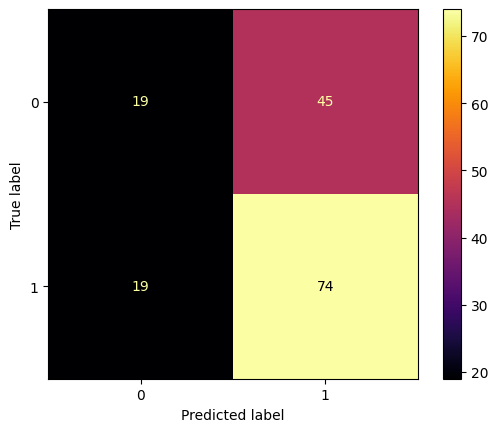

In [153]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_log_reg.classes_)
disp.plot(cmap='inferno')
plt.show()

### Подбор порога классификация для precision = 1

In [154]:
y_proba = model_log_reg.predict_proba(X_test)[:,1]
y_proba = pd.Series(y_proba)

In [155]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 10,endpoint=False)]
print(thresholds) 

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


In [156]:
precision_list = []
recall_list = []
accuracy_list = []
for i in thresholds:
    y_pred_new = y_proba.apply(lambda x: 1 if x>i else 0)
    precision = precision_score(y_test, y_pred_new)
    recall = recall_score(y_test, y_pred_new)
    accuracy = accuracy_score(y_test, y_pred_new)
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
precision_list

[0.6218487394957983,
 0.63,
 0.68,
 0.7068965517241379,
 0.84375,
 0.8,
 0.0,
 0.0,
 0.0,
 0.0]

In [157]:
index_max_precision = precision_list.index(max(precision_list))  
index_max_precision

4

In [158]:
thresholds[index_max_precision]

0.7

In [159]:
y_pred_new = y_proba.apply(lambda x: 1 if x>=thresholds[index_max_precision] else 0)
y_pred_new.sum()

32

In [160]:
accuracy = accuracy_score(y_test, y_pred_new)
accuracy

0.5477707006369427

In [161]:
recall = recall_score(y_test, y_pred_new)
recall

0.2903225806451613

In [162]:
precision = precision_score (y_test, y_pred_new)
precision

0.84375

Максимальный precision мы получаем при пороге 0,7 при этом остальные метрики сильно ухудшились. Но главное, что мы меньше ошибаемся с определением вкусного молока.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
- найдено верное решение для минимизации риска плохого прогноза (стараемся занулить FP, поднимая presicion)  с помощью манипуляции порогом    
    
 
<div class="alert alert-warning">



Совет 🤔:



- а ведь порог стоит начать подбирать как минимум с 0.5 (можешь это обосновать?)



- вместо перебора по циклу можно было использовать precision_recall_curve, который возвращает три значения: precisions, recalls, thresholds 



- и почему бы не построить красивый график метрик для разных значений threshold

 


    





<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Начало выбора порога поменял. 0,5 связано с тем, что у нас по умолчанию порог 0,5 у модели логистической регрессии?
    
Не уверен что красиво, но график порогов и значений метрик добавил ниже =)
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



    Начало выбора порога поменял. 0,5 связано с тем, что у нас по умолчанию порог 0,5 у модели логистической регрессии?

    
Верно, ещё принципиально указать на то что при пороге 0,5 у нас FP=45,  поэтому смысла опускаться ниже 0,5 у нас уже нет    

Text(0.5, 0, 'Значения метрик')

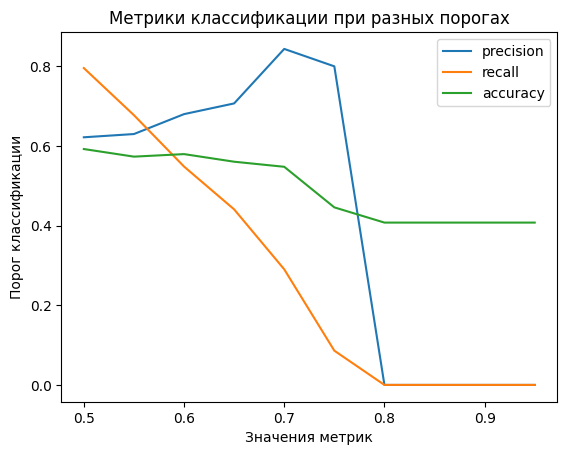

In [163]:
sns.lineplot(x=thresholds, y=precision_list, label='precision')
sns.lineplot(x=thresholds, y=recall_list, label='recall')
sns.lineplot(x=thresholds, y=accuracy_list, label='accuracy');
plt.title('Метрики классификации при разных порогах')
plt.ylabel('Порог классификации')
plt.xlabel('Значения метрик')


### Предсказываем на рабочем датасете

In [164]:
df_cow_buy[num_cols_name] = scaler.transform(df_cow_buy[num_cols_name])

In [165]:
df_cow_buy[ohe_cols_name] = encoder.transform(df_cow_buy[cat_cols_name])
df_cow_buy = df_cow_buy.drop(cat_cols_name, axis=1)

In [166]:
y_proba = model_log_reg.predict_proba(df_cow_buy)[:,1]

In [167]:
df_cow_buy['вкус'] = pd.Series(y_proba).apply(lambda x: 'вкусное' if x>=thresholds[index_max_precision] else 'не вкусное')

In [168]:
df_cow_buy[df_cow_buy['вкус'] == 'вкусное']

,жирность_%,белок_%,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,вкус
16,0.749961,1.245313,0.0,1.0,1.0,0.0,0.0,0.0,1.0,вкусное


Добавим столбец с предсказанием вкуса в первоначальный датасет, где уже предсказан удой и выведем на экран корову, которую рекоммендуем купить заказчику.

In [169]:
df_cow_buy_original['вкус'] = df_cow_buy['вкус']
df_cow_buy_original[df_cow_buy_original['вкус'] == 'вкусное']

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,прогнозный_удой,вкус
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,6358.196713,вкусное


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. При изменении выбора порога с 0,5 появилась одна корова, которой предсказано вкусное молоко. Берем эту буренку.
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





- Тем не менее у нас стоит задача оставить рекомендации с учетом снижений рисков по вкусу (помимо удоя).  Возможно в данный присутствует много шума, поэтому порог найденный на тестовой выборке не отработал на реальных данных, возможно набор признаков оказался недостаточно удачным, и модель плохо  обучилась, но рекомендации стоит оставить.  Попробуй снизить порог



In [170]:
model_log_reg.coef_

array([[ 0.24631662,  0.27964311, -0.10967478,  0.53797645, -0.16344245,
        -0.27297529, -0.40508924, -0.52996713, -0.37027553]])

In [171]:
df_cow_buy.columns

Index(['жирность_%', 'белок_%', 'x0_РефлешнСоверинг', 'x1_Холмистое',
       'x2_Соверин', 'x3_менее_2_лет', 'x4_Буйный', 'x4_Геркулес',
       'x4_Соловчик', 'вкус'],
      dtype='object')

In [172]:
df_cow_buy = df_cow_buy.drop('вкус', axis=1)

In [173]:
for feature_number, feature_name in enumerate(df_cow_buy.columns):
    exp_weight = math.exp(model_log_reg.coef_[0, feature_number])
    print(f'{feature_name:<20} : {exp_weight:+.2f}')

жирность_%           : +1.28
белок_%              : +1.32
x0_РефлешнСоверинг   : +0.90
x1_Холмистое         : +1.71
x2_Соверин           : +0.85
x3_менее_2_лет       : +0.76
x4_Буйный            : +0.67
x4_Геркулес          : +0.59
x4_Соловчик          : +0.69


In [174]:
df_cow_buy_original

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,прогнозный_удой,вкус
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6593.261477,не вкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6324.029235,не вкусное
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6298.899865,не вкусное
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6603.245402,не вкусное
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6545.318235,не вкусное
...,...,...,...,...,...,...,...,...,...,...,...,...
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,6603.245402,не вкусное
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,6358.196713,вкусное
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.958744,6379.312550,не вкусное
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.958744,6540.555150,не вкусное


 
 
    
<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


отлично, но не забываем что в Логистической регрессия ещё есть логарифм, поэтому если хочешь посмотреть как изменение признака на единицу влияют на вероятность отнесения к классу, то посомтри на экспоненту к коэффициентам логистической регрессии (Это точно было в тренажёре). Кроме того стоит соотнести эти коэффициенты с признаками, а так получается просто цифры

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
v1. Поправил, как в лекциях. Возвел экспоненту в степень равную весам.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


### Выводы по модели Логистической регрессии

Судя по коэффициентам модели:
* наиболее важным признаком для вкуса молока является Холмистая территория для пастбища
* Также хуже всего вкус молока будет у коров возрастом до двух лет. Таких брать не стоит
* Если фермер всёже рискнет взять корову из представленного списка, то ему стоит обратить внимание на коров: старше 2-х лет, с Холмистых пастбищ и максимальным значением белка и жирности. Тогда шанс купить корову с молоком нужного качества будет максимальным. Ну и не стоит брать коров от быков Буйный и Геркулес.

## Итоговые выводы

* Итоговый датафрейм для заказчика

In [175]:
pd.set_option('display.max_rows', 20)
df_cow_buy_original

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро-протеиновое_соотношение,прогнозный_удой,вкус
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6593.261477,не вкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6324.029235,не вкусное
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6298.899865,не вкусное
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6603.245402,не вкусное
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6545.318235,не вкусное
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,6379.312550,не вкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6593.261477,не вкусное
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,6540.555150,не вкусное
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6298.899865,не вкусное
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,6386.719487,не вкусное


* Под требования заказчика попадает одна корова с индексом 16. Если заказчик хочет преобрести больше коров, то мы можем снизить требования по вкусу (порог классификации) и выбрать ему больше коров. 

* В задаче мы улучшили качество регрессионой модели для предсказания удоя через устранение нелинейности в признаках СПО и ЭКЕ. СПО сделали категориальным признаком, ЭКЕ возвели в квадрат.

* Наша модель показала плохой прогноз для коров с удоем выше 6500л, т.к. в тренировочной выборке значительно меньше коров в этом диапозоне. Качество модели можно улучшить. если добавить больше примеров с высоким удоем.
* Также на тестовой выборке на приходилось довольствоваться средними значениями значениями основных признаков, которые по матрице корреляции сильнее всего влияют на удой. На будущее желательно получить от поставщика точные даынне о показателях СПО и ЭКЕ

* При выборе метрики классификации молока на вкусное/не вкусное мы ориентировались на precision. Максимизация этой метрики дает модели возможно как можно реже ошибаться с присовоением молоку класса "вкусно".

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Такое частенько бывает




<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Александр, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют, графики оформлены аккуратно, код подробно прокомментирован. Проект конечно очень непростой с точки зрения обьема.  Теперь первый проект касающийся непосредственно машинного обучения стал гораздо насыщенней, теперь как раньше мы не ограничиваемся перебором лучших гиперпараметров, а можем увидеть как работать с признаками (что на самом деле и составляет большую часть работы дата-сантиста) и как с помощью этого мы можем нивелировать те или иные недостатки той или иной модели и добиться лучшего результата

     

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    
В частности: 

- я бы тебе посоветовал поработать над более  симпатичным представлением графиков с помощью subplots и seaborn

- проект довольно большой, с постоянно повторяющимся кодом, так и запутаться недолго. Так что тут ты можно поразмыслить над архитектурой, и написать функции которые позволят сделать проект читабельней: это и в части графиков, и подсчета метрик, и процесса моделирования. Конкретные советы я оставил


Обязательное к исправлению:



    
- начинаем с описания проекта
    



- не указан  decimal, а данные стоит сразу привести  к коректному виду

    
    
    
- предпочтительно  использование как гистограммы, так и ящика с усами в анализе колличественных данных. И достраиваем графики для всех признаков, в том числе для категориальных
    


- нет проверки на мультиколлинеарность
    
    
    
 
- не забываем что Пирсона используем только если количественный признак распределён нормально
    
    
    
- характеризуем тип связи между таргетом и  признаками (Находим нелинейность)
    
    
     
    
- нелогично использовать жирность и белок для прогноза у удоя  (Хотя можешь обосновать своё мнение) 
    
    
    
- после преобразований спо стал категориальным признаком, поэтому его стоит обработать как категориальный (пусть даже ничего не изменится в расчетах)


    
- считаем полный набор метрик    

 
- и всё-таки какие-то рекомендации минимизирующие риск оставить нужно (можно попробовать обучить модель на других признаках, чтобы прогноз на тесте и на реальных данных были более похожи, либо снизить порог, предположив что в данных много шума изза чего порог с тестовой не получилось использовать на реальных данных)

 
- общий вывод (лицо проекта) пишем


    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!   Постарался ответить на твои вопросы  

    
Красное исправлено (а их было немало), многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

 
  
Отличная работа Александр. Желаю успехов в дальнейшей учебе!
